Main code for all the machine learning algorithms used for predictions

In [ ]:
%cd "F:\Ishani\Modeling"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
pd.set_option("display.max_columns", 50)
import pickle

In [5]:
#pip install xlrd==1.2.0

In [3]:
# Read the master file
df = pd.read_excel('Master file.xlsx')

In [4]:
df

,Ligand Number,Name,Docking Name,ZINC ID,Docking 1,Docking 2,Docking 3,Dmean,Dstd,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,...,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,ligand1,master_docking1363,ZINC000001530427,-5.1,-5.1,-5.2,-5.133333,5.773503e-02,2,-0.6449,0.415896,25.4657,16.785551,0,0,15,8,7,0,3,0,4,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,ligand2,master_docking583,ZINC000003807804,-7.2,-7.2,-7.1,-7.166667,5.773503e-02,0,2.0324,4.130650,115.1108,54.435481,23,23,42,25,17,0,22,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,ligand3,master_docking710,ZINC000000120286,-7.0,-6.8,-6.7,-6.833333,1.527525e-01,0,-1.3099,1.715838,71.4449,36.154723,16,18,30,19,11,0,12,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,ligand4,top_docking17,ZINC000242548690,-10.4,-10.6,-10.4,-10.466667,1.154701e-01,0,-3.6782,13.529155,184.4640,126.062752,0,0,119,55,64,0,41,0,14,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,ligand5,master_docking1135,ZINC000000008492,-5.8,-5.8,-5.8,-5.800000,0.000000e+00,0,-0.0692,0.004789,47.5361,22.409551,10,11,18,11,7,0,9,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,1611,ligand1611,master_docking1294,ZINC000022010387,-5.4,-5.4,-5.4,-5.400000,1.087792e-15,0,1.1429,1.306220,62.0684,34.357481,6,6,31,14,17,0,12,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1601,1612,ligand1612,master_docking1028,ZINC000022448097,-6.0,-6.2,-6.1,-6.100000,1.000000e-01,5,-1.1620,1.350244,130.6734,74.606169,6,6,70,37,33,0,23,3,11,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1602,1613,ligand1613,master_docking45,ZINC000100370145,-9.7,-9.6,-9.1,-9.466667,3.214550e-01,2,1.4322,2.051197,147.3520,84.166962,6,6,72,38,34,0,28,0,8,2,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1603,1614,ligand1614,master_docking1565,ZINC000059111167,-3.6,-3.6,-3.6,-3.600000,0.000000e+00,0,-0.8900,0.792100,25.7960,19.796723,0,0,19,8,11,0,6,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Remove columns unnecassary for calculations
df = df.drop(['Ligand Number', 'Docking Name', 'ZINC ID', 'Docking 1', 'Docking 2', 'Docking 3', 
        'Dstd'], axis = 1)
df

,Name,Dmean,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,...,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,ligand1,-5.133333,2,-0.6449,0.415896,25.4657,16.785551,0,0,15,8,7,0,3,0,4,0,1,0,0,0,0,0,2423.150747,2624.319154,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ligand2,-7.166667,0,2.0324,4.130650,115.1108,54.435481,23,23,42,25,17,0,22,2,0,0,0,0,1,0,0,1,4840.178348,4646.611493,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ligand3,-6.833333,0,-1.3099,1.715838,71.4449,36.154723,16,18,30,19,11,0,12,7,0,0,0,0,0,0,0,0,3115.718499,3438.509833,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ligand4,-10.466667,0,-3.6782,13.529155,184.4640,126.062752,0,0,119,55,64,0,41,0,14,0,0,0,0,0,0,0,9563.409071,10749.245786,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ligand5,-5.800000,0,-0.0692,0.004789,47.5361,22.409551,10,11,18,11,7,0,9,1,1,0,0,0,0,0,0,0,1757.653587,1915.786752,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,ligand1611,-5.400000,0,1.1429,1.306220,62.0684,34.357481,6,6,31,14,17,0,12,1,1,0,0,0,0,0,0,0,2200.606590,2537.503915,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1601,ligand1612,-6.100000,5,-1.1620,1.350244,130.6734,74.606169,6,6,70,37,33,0,23,3,11,0,0,0,0,0,0,0,6755.841053,6547.969921,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1602,ligand1613,-9.466667,2,1.4322,2.051197,147.3520,84.166962,6,6,72,38,34,0,28,0,8,2,0,0,0,0,0,0,8177.372772,9268.173610,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1603,ligand1614,-3.600000,0,-0.8900,0.792100,25.7960,19.796723,0,0,19,8,11,0,6,1,1,0,0,0,0,0,0,0,1328.925480,1286.774463,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df1 = df
df1

,Name,Dmean,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,...,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,ligand1,-5.133333,2,-0.6449,0.415896,25.4657,16.785551,0,0,15,8,7,0,3,0,4,0,1,0,0,0,0,0,2423.150747,2624.319154,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ligand2,-7.166667,0,2.0324,4.130650,115.1108,54.435481,23,23,42,25,17,0,22,2,0,0,0,0,1,0,0,1,4840.178348,4646.611493,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ligand3,-6.833333,0,-1.3099,1.715838,71.4449,36.154723,16,18,30,19,11,0,12,7,0,0,0,0,0,0,0,0,3115.718499,3438.509833,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ligand4,-10.466667,0,-3.6782,13.529155,184.4640,126.062752,0,0,119,55,64,0,41,0,14,0,0,0,0,0,0,0,9563.409071,10749.245786,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ligand5,-5.800000,0,-0.0692,0.004789,47.5361,22.409551,10,11,18,11,7,0,9,1,1,0,0,0,0,0,0,0,1757.653587,1915.786752,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,ligand1611,-5.400000,0,1.1429,1.306220,62.0684,34.357481,6,6,31,14,17,0,12,1,1,0,0,0,0,0,0,0,2200.606590,2537.503915,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1601,ligand1612,-6.100000,5,-1.1620,1.350244,130.6734,74.606169,6,6,70,37,33,0,23,3,11,0,0,0,0,0,0,0,6755.841053,6547.969921,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1602,ligand1613,-9.466667,2,1.4322,2.051197,147.3520,84.166962,6,6,72,38,34,0,28,0,8,2,0,0,0,0,0,0,8177.372772,9268.173610,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1603,ligand1614,-3.600000,0,-0.8900,0.792100,25.7960,19.796723,0,0,19,8,11,0,6,1,1,0,0,0,0,0,0,0,1328.925480,1286.774463,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Removing all columns which has 90% of the rowvalues as 0. This cut-off is used for 
#initial identification of important parameters

for i in range(2, 2326):
    if (df1.iloc[:,i] == 0).sum() >= 1444:
        df.iloc[:, i] = np.nan
        
df

,Name,Dmean,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,...,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,ligand1,-5.133333,2,-0.6449,0.415896,25.4657,16.785551,0,0,15,8,7,NaN,3,0,4,0,NaN,0,0,NaN,NaN,0,2423.150747,2624.319154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,ligand2,-7.166667,0,2.0324,4.130650,115.1108,54.435481,23,23,42,25,17,NaN,22,2,0,0,NaN,0,1,NaN,NaN,1,4840.178348,4646.611493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,ligand3,-6.833333,0,-1.3099,1.715838,71.4449,36.154723,16,18,30,19,11,NaN,12,7,0,0,NaN,0,0,NaN,NaN,0,3115.718499,3438.509833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,ligand4,-10.466667,0,-3.6782,13.529155,184.4640,126.062752,0,0,119,55,64,NaN,41,0,14,0,NaN,0,0,NaN,NaN,0,9563.409071,10749.245786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,ligand5,-5.800000,0,-0.0692,0.004789,47.5361,22.409551,10,11,18,11,7,NaN,9,1,1,0,NaN,0,0,NaN,NaN,0,1757.653587,1915.786752,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,ligand1611,-5.400000,0,1.1429,1.306220,62.0684,34.357481,6,6,31,14,17,NaN,12,1,1,0,NaN,0,0,NaN,NaN,0,2200.606590,2537.503915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1601,ligand1612,-6.100000,5,-1.1620,1.350244,130.6734,74.606169,6,6,70,37,33,NaN,23,3,11,0,NaN,0,0,NaN,NaN,0,6755.841053,6547.969921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1602,ligand1613,-9.466667,2,1.4322,2.051197,147.3520,84.166962,6,6,72,38,34,NaN,28,0,8,2,NaN,0,0,NaN,NaN,0,8177.372772,9268.173610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1603,ligand1614,-3.600000,0,-0.8900,0.792100,25.7960,19.796723,0,0,19,8,11,NaN,6,1,1,0,NaN,0,0,NaN,NaN,0,1328.925480,1286.774463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
df1 = df.dropna(axis = 1, how='all')
df1

,Name,Dmean,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,nN,nO,nS,nF,nCl,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,...,PubchemFP699,PubchemFP700,PubchemFP701,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP708,PubchemFP709,PubchemFP710,PubchemFP711,PubchemFP712,PubchemFP714,PubchemFP734,PubchemFP735,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP880
0,ligand1,-5.133333,2,-0.6449,0.415896,25.4657,16.785551,0,0,15,8,7,3,0,4,0,0,0,0,2423.150747,2624.319154,2750.008514,1985.620081,781.102143,171.389232,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ligand2,-7.166667,0,2.0324,4.130650,115.1108,54.435481,23,23,42,25,17,22,2,0,0,0,1,1,4840.178348,4646.611493,6780.842949,7908.357415,9949.371279,11845.513737,...,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ligand3,-6.833333,0,-1.3099,1.715838,71.4449,36.154723,16,18,30,19,11,12,7,0,0,0,0,0,3115.718499,3438.509833,5076.016358,5378.212887,4837.437747,3975.185474,...,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ligand4,-10.466667,0,-3.6782,13.529155,184.4640,126.062752,0,0,119,55,64,41,0,14,0,0,0,0,9563.409071,10749.245786,17830.492794,21645.627389,21474.592002,20093.604310,...,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0
4,ligand5,-5.800000,0,-0.0692,0.004789,47.5361,22.409551,10,11,18,11,7,9,1,1,0,0,0,0,1757.653587,1915.786752,2635.351652,2627.433915,1700.110265,691.525511,...,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,ligand1611,-5.400000,0,1.1429,1.306220,62.0684,34.357481,6,6,31,14,17,12,1,1,0,0,0,0,2200.606590,2537.503915,3496.376564,3689.718924,2991.309571,2333.649120,...,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1601,ligand1612,-6.100000,5,-1.1620,1.350244,130.6734,74.606169,6,6,70,37,33,23,3,11,0,0,0,0,6755.841053,6547.969921,9115.405340,9179.927479,10512.998352,11967.849153,...,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1602,ligand1613,-9.466667,2,1.4322,2.051197,147.3520,84.166962,6,6,72,38,34,28,0,8,2,0,0,0,8177.372772,9268.173610,12835.398182,14346.566403,15984.891182,15118.476063,...,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1603,ligand1614,-3.600000,0,-0.8900,0.792100,25.7960,19.796723,0,0,19,8,11,6,1,1,0,0,0,0,1328.925480,1286.774463,1649.687081,1520.895415,960.802484,283.649353,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df2 = df1.drop(columns = 'Name')
df2

,Dmean,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,nN,nO,nS,nF,nCl,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,...,PubchemFP699,PubchemFP700,PubchemFP701,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP708,PubchemFP709,PubchemFP710,PubchemFP711,PubchemFP712,PubchemFP714,PubchemFP734,PubchemFP735,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP880
0,-5.133333,2,-0.6449,0.415896,25.4657,16.785551,0,0,15,8,7,3,0,4,0,0,0,0,2423.150747,2624.319154,2750.008514,1985.620081,781.102143,171.389232,6.096384,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-7.166667,0,2.0324,4.130650,115.1108,54.435481,23,23,42,25,17,22,2,0,0,0,1,1,4840.178348,4646.611493,6780.842949,7908.357415,9949.371279,11845.513737,10203.180398,...,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-6.833333,0,-1.3099,1.715838,71.4449,36.154723,16,18,30,19,11,12,7,0,0,0,0,0,3115.718499,3438.509833,5076.016358,5378.212887,4837.437747,3975.185474,3329.526318,...,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-10.466667,0,-3.6782,13.529155,184.4640,126.062752,0,0,119,55,64,41,0,14,0,0,0,0,9563.409071,10749.245786,17830.492794,21645.627389,21474.592002,20093.604310,18864.492630,...,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0
4,-5.800000,0,-0.0692,0.004789,47.5361,22.409551,10,11,18,11,7,9,1,1,0,0,0,0,1757.653587,1915.786752,2635.351652,2627.433915,1700.110265,691.525511,83.774880,...,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,-5.400000,0,1.1429,1.306220,62.0684,34.357481,6,6,31,14,17,12,1,1,0,0,0,0,2200.606590,2537.503915,3496.376564,3689.718924,2991.309571,2333.649120,1460.705763,...,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1601,-6.100000,5,-1.1620,1.350244,130.6734,74.606169,6,6,70,37,33,23,3,11,0,0,0,0,6755.841053,6547.969921,9115.405340,9179.927479,10512.998352,11967.849153,13376.424453,...,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1602,-9.466667,2,1.4322,2.051197,147.3520,84.166962,6,6,72,38,34,28,0,8,2,0,0,0,8177.372772,9268.173610,12835.398182,14346.566403,15984.891182,15118.476063,9432.321228,...,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1603,-3.600000,0,-0.8900,0.792100,25.7960,19.796723,0,0,19,8,11,6,1,1,0,0,0,0,1328.925480,1286.774463,1649.687081,1520.895415,960.802484,283.649353,36.321264,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df2 = df2.fillna(0.0)
df2

,Dmean,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,nN,nO,nS,nF,nCl,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,...,PubchemFP699,PubchemFP700,PubchemFP701,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP708,PubchemFP709,PubchemFP710,PubchemFP711,PubchemFP712,PubchemFP714,PubchemFP734,PubchemFP735,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP880
0,-5.133333,2,-0.6449,0.415896,25.4657,16.785551,0,0,15,8,7,3,0,4,0,0,0,0,2423.150747,2624.319154,2750.008514,1985.620081,781.102143,171.389232,6.096384,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-7.166667,0,2.0324,4.130650,115.1108,54.435481,23,23,42,25,17,22,2,0,0,0,1,1,4840.178348,4646.611493,6780.842949,7908.357415,9949.371279,11845.513737,10203.180398,...,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-6.833333,0,-1.3099,1.715838,71.4449,36.154723,16,18,30,19,11,12,7,0,0,0,0,0,3115.718499,3438.509833,5076.016358,5378.212887,4837.437747,3975.185474,3329.526318,...,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-10.466667,0,-3.6782,13.529155,184.4640,126.062752,0,0,119,55,64,41,0,14,0,0,0,0,9563.409071,10749.245786,17830.492794,21645.627389,21474.592002,20093.604310,18864.492630,...,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0
4,-5.800000,0,-0.0692,0.004789,47.5361,22.409551,10,11,18,11,7,9,1,1,0,0,0,0,1757.653587,1915.786752,2635.351652,2627.433915,1700.110265,691.525511,83.774880,...,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,-5.400000,0,1.1429,1.306220,62.0684,34.357481,6,6,31,14,17,12,1,1,0,0,0,0,2200.606590,2537.503915,3496.376564,3689.718924,2991.309571,2333.649120,1460.705763,...,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1601,-6.100000,5,-1.1620,1.350244,130.6734,74.606169,6,6,70,37,33,23,3,11,0,0,0,0,6755.841053,6547.969921,9115.405340,9179.927479,10512.998352,11967.849153,13376.424453,...,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1602,-9.466667,2,1.4322,2.051197,147.3520,84.166962,6,6,72,38,34,28,0,8,2,0,0,0,8177.372772,9268.173610,12835.398182,14346.566403,15984.891182,15118.476063,9432.321228,...,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1603,-3.600000,0,-0.8900,0.792100,25.7960,19.796723,0,0,19,8,11,6,1,1,0,0,0,0,1328.925480,1286.774463,1649.687081,1520.895415,960.802484,283.649353,36.321264,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df_x = df2.drop(columns = 'Dmean')
df_x
df_y = df2['Dmean']

In [12]:
df_x = df_x.apply(pd.to_numeric, downcast="float", errors='coerce')
df_x

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,nN,nO,nS,nF,nCl,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,...,PubchemFP699,PubchemFP700,PubchemFP701,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP708,PubchemFP709,PubchemFP710,PubchemFP711,PubchemFP712,PubchemFP714,PubchemFP734,PubchemFP735,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP880
0,2.0,-0.6449,0.415896,25.465700,16.785551,0.0,0.0,15.0,8.0,7.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,2423.150635,2624.319092,2750.008545,1985.620117,781.102173,171.389236,6.096384,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0324,4.130650,115.110802,54.435482,23.0,23.0,42.0,25.0,17.0,22.0,2.0,0.0,0.0,0.0,1.0,1.0,4840.178223,4646.611328,6780.842773,7908.357422,9949.371094,11845.513672,10203.180664,4668.729004,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-1.3099,1.715838,71.444901,36.154724,16.0,18.0,30.0,19.0,11.0,12.0,7.0,0.0,0.0,0.0,0.0,0.0,3115.718506,3438.509766,5076.016602,5378.212891,4837.437988,3975.185547,3329.526367,2170.322510,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-3.6782,13.529155,184.464005,126.062752,0.0,0.0,119.0,55.0,64.0,41.0,0.0,14.0,0.0,0.0,0.0,0.0,9563.409180,10749.246094,17830.492188,21645.626953,21474.591797,20093.603516,18864.492188,17899.916016,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,0.0,-0.0692,0.004789,47.536098,22.409552,10.0,11.0,18.0,11.0,7.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,1757.653564,1915.786743,2635.351562,2627.433838,1700.110229,691.525513,83.774879,3.048192,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,0.0,1.1429,1.306220,62.068401,34.357479,6.0,6.0,31.0,14.0,17.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,2200.606689,2537.503906,3496.376465,3689.718994,2991.309570,2333.649170,1460.705811,578.233521,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,5.0,-1.1620,1.350244,130.673401,74.606171,6.0,6.0,70.0,37.0,33.0,23.0,3.0,11.0,0.0,0.0,0.0,0.0,6755.840820,6547.969727,9115.405273,9179.927734,10512.998047,11967.849609,13376.424805,13099.650391,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,2.0,1.4322,2.051197,147.352005,84.166962,6.0,6.0,72.0,38.0,34.0,28.0,0.0,8.0,2.0,0.0,0.0,0.0,8177.372559,9268.173828,12835.398438,14346.566406,15984.891602,15118.475586,9432.321289,8158.282715,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0.0,-0.8900,0.792100,25.796000,19.796722,0.0,0.0,19.0,8.0,11.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,1328.925537,1286.774414,1649.687134,1520.895386,960.802490,283.649353,36.321262,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Scaling the dataset

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(df_x)

StandardScaler()

In [16]:
scaled_features = scaler.transform(df_x)

In [17]:
df_feat_sc = pd.DataFrame(scaled_features, columns=df_x.columns)
df_feat_sc

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,nN,nO,nS,nF,nCl,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,...,PubchemFP699,PubchemFP700,PubchemFP701,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP708,PubchemFP709,PubchemFP710,PubchemFP711,PubchemFP712,PubchemFP714,PubchemFP734,PubchemFP735,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP880
0,2.239766,-0.249258,-0.451648,-1.665249,-1.503740,-1.229977,-1.203283,-1.444623,-1.501371,-1.294619,-1.715920,-1.141186,0.116671,-0.424561,-0.305075,-0.348154,-0.484157,-0.488596,-0.967432,-1.218248,-1.262564,-0.824919,-1.253782,-1.111063,-0.927489,...,-0.604944,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,-1.984556,-1.866344,-1.820581,-0.430554,-0.795460,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,-0.437649,-0.494152,-0.511657,-0.457706,-0.520369,-0.420341,-0.429537,0.0
1,-0.411284,1.195926,0.098502,0.422114,-0.029317,2.410837,2.261013,-0.286900,-0.005428,-0.516101,0.400525,-0.089749,-1.199718,-0.424561,-0.305075,1.248382,0.368831,-0.102532,-0.094642,-0.103975,-0.037880,0.133787,0.734485,0.507111,-0.246948,...,-0.604944,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,1.257134,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,-0.437649,-0.494152,-0.511657,-0.457706,-0.520369,-0.420341,-0.429537,0.0
2,-0.411284,-0.608220,-0.259129,-0.594635,-0.745217,1.302763,1.507905,-0.801443,-0.533408,-0.983212,-0.713394,2.538844,-1.199718,-0.424561,-0.305075,-0.348154,-0.484157,-0.377974,-0.616040,-0.575253,-0.561055,-0.400757,-0.605942,-0.583668,-0.611130,...,-0.604944,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,-0.795460,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,-0.437649,-0.494152,-0.511657,-0.457706,-0.520369,-0.420341,-0.429537,0.0
3,-0.411284,-1.886608,1.490409,2.036986,2.775704,-1.229977,-1.203283,3.014757,2.634472,3.142931,2.516969,-1.141186,3.407641,-0.424561,-0.305075,-0.348154,-0.484157,0.651894,2.539160,2.950560,2.802668,1.338953,2.139251,1.881573,1.681708,...,1.653045,2.886416,2.463835,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,2.322590,1.257134,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,2.284935,2.023669,1.954436,2.184807,1.921713,2.379023,-0.429537,0.0
4,-0.411284,0.061500,-0.512533,-1.151346,-1.283497,0.352986,0.453554,-1.315987,-1.237381,-1.294619,-1.047569,-0.615467,-0.870621,-0.424561,-0.305075,-0.348154,-0.484157,-0.594893,-1.273224,-1.249944,-1.129852,-0.728820,-1.165196,-1.098736,-0.927045,...,1.653045,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,-0.795460,-0.414165,-0.337357,2.658068,-0.389054,-0.349825,2.502487,-0.437649,-0.494152,-0.511657,2.184807,-0.520369,-0.420341,2.328089,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,-0.411284,0.715781,-0.319792,-0.812965,-0.815599,-0.280199,-0.299554,-0.758565,-0.973391,-0.516101,-0.713394,-0.615467,-0.870621,-0.424561,-0.305075,-0.348154,-0.484157,-0.524142,-1.004900,-1.011924,-0.910196,-0.593802,-0.885519,-0.880231,-0.843202,...,-0.604944,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,-0.795460,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,-0.437649,-0.494152,-0.511657,-0.457706,-0.520369,-0.420341,-0.429537,0.0
1601,6.216341,-0.528385,-0.313273,0.784485,0.760594,-0.280199,-0.299554,0.913703,1.050532,0.729527,0.511917,0.435970,2.420350,-0.424561,-0.305075,-0.348154,-0.484157,0.203450,0.725955,0.541385,0.225051,0.192724,0.755321,1.010672,0.981993,...,-0.604944,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,-0.795460,2.414495,-0.337357,-0.376213,-0.389054,

In [18]:
df_feat_sc.shape

(1605, 1350)

In [19]:
X = df_feat_sc
y = df_y

In [20]:
X

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,nN,nO,nS,nF,nCl,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,...,PubchemFP699,PubchemFP700,PubchemFP701,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP708,PubchemFP709,PubchemFP710,PubchemFP711,PubchemFP712,PubchemFP714,PubchemFP734,PubchemFP735,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP880
0,2.239766,-0.249258,-0.451648,-1.665249,-1.503740,-1.229977,-1.203283,-1.444623,-1.501371,-1.294619,-1.715920,-1.141186,0.116671,-0.424561,-0.305075,-0.348154,-0.484157,-0.488596,-0.967432,-1.218248,-1.262564,-0.824919,-1.253782,-1.111063,-0.927489,...,-0.604944,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,-1.984556,-1.866344,-1.820581,-0.430554,-0.795460,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,-0.437649,-0.494152,-0.511657,-0.457706,-0.520369,-0.420341,-0.429537,0.0
1,-0.411284,1.195926,0.098502,0.422114,-0.029317,2.410837,2.261013,-0.286900,-0.005428,-0.516101,0.400525,-0.089749,-1.199718,-0.424561,-0.305075,1.248382,0.368831,-0.102532,-0.094642,-0.103975,-0.037880,0.133787,0.734485,0.507111,-0.246948,...,-0.604944,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,1.257134,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,-0.437649,-0.494152,-0.511657,-0.457706,-0.520369,-0.420341,-0.429537,0.0
2,-0.411284,-0.608220,-0.259129,-0.594635,-0.745217,1.302763,1.507905,-0.801443,-0.533408,-0.983212,-0.713394,2.538844,-1.199718,-0.424561,-0.305075,-0.348154,-0.484157,-0.377974,-0.616040,-0.575253,-0.561055,-0.400757,-0.605942,-0.583668,-0.611130,...,-0.604944,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,-0.795460,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,-0.437649,-0.494152,-0.511657,-0.457706,-0.520369,-0.420341,-0.429537,0.0
3,-0.411284,-1.886608,1.490409,2.036986,2.775704,-1.229977,-1.203283,3.014757,2.634472,3.142931,2.516969,-1.141186,3.407641,-0.424561,-0.305075,-0.348154,-0.484157,0.651894,2.539160,2.950560,2.802668,1.338953,2.139251,1.881573,1.681708,...,1.653045,2.886416,2.463835,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,2.322590,1.257134,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,2.284935,2.023669,1.954436,2.184807,1.921713,2.379023,-0.429537,0.0
4,-0.411284,0.061500,-0.512533,-1.151346,-1.283497,0.352986,0.453554,-1.315987,-1.237381,-1.294619,-1.047569,-0.615467,-0.870621,-0.424561,-0.305075,-0.348154,-0.484157,-0.594893,-1.273224,-1.249944,-1.129852,-0.728820,-1.165196,-1.098736,-0.927045,...,1.653045,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,-0.795460,-0.414165,-0.337357,2.658068,-0.389054,-0.349825,2.502487,-0.437649,-0.494152,-0.511657,2.184807,-0.520369,-0.420341,2.328089,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,-0.411284,0.715781,-0.319792,-0.812965,-0.815599,-0.280199,-0.299554,-0.758565,-0.973391,-0.516101,-0.713394,-0.615467,-0.870621,-0.424561,-0.305075,-0.348154,-0.484157,-0.524142,-1.004900,-1.011924,-0.910196,-0.593802,-0.885519,-0.880231,-0.843202,...,-0.604944,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,-0.795460,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,-0.437649,-0.494152,-0.511657,-0.457706,-0.520369,-0.420341,-0.429537,0.0
1601,6.216341,-0.528385,-0.313273,0.784485,0.760594,-0.280199,-0.299554,0.913703,1.050532,0.729527,0.511917,0.435970,2.420350,-0.424561,-0.305075,-0.348154,-0.484157,0.203450,0.725955,0.541385,0.225051,0.192724,0.755321,1.010672,0.981993,...,-0.604944,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,-0.795460,2.414495,-0.337357,-0.376213,-0.389054,

In [21]:
merged = pd.concat([X, y], axis=1)
merged

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,nN,nO,nS,nF,nCl,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,...,PubchemFP700,PubchemFP701,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP708,PubchemFP709,PubchemFP710,PubchemFP711,PubchemFP712,PubchemFP714,PubchemFP734,PubchemFP735,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP880,Dmean
0,2.239766,-0.249258,-0.451648,-1.665249,-1.503740,-1.229977,-1.203283,-1.444623,-1.501371,-1.294619,-1.715920,-1.141186,0.116671,-0.424561,-0.305075,-0.348154,-0.484157,-0.488596,-0.967432,-1.218248,-1.262564,-0.824919,-1.253782,-1.111063,-0.927489,...,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,-1.984556,-1.866344,-1.820581,-0.430554,-0.795460,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,-0.437649,-0.494152,-0.511657,-0.457706,-0.520369,-0.420341,-0.429537,0.0,-5.133333
1,-0.411284,1.195926,0.098502,0.422114,-0.029317,2.410837,2.261013,-0.286900,-0.005428,-0.516101,0.400525,-0.089749,-1.199718,-0.424561,-0.305075,1.248382,0.368831,-0.102532,-0.094642,-0.103975,-0.037880,0.133787,0.734485,0.507111,-0.246948,...,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,1.257134,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,-0.437649,-0.494152,-0.511657,-0.457706,-0.520369,-0.420341,-0.429537,0.0,-7.166667
2,-0.411284,-0.608220,-0.259129,-0.594635,-0.745217,1.302763,1.507905,-0.801443,-0.533408,-0.983212,-0.713394,2.538844,-1.199718,-0.424561,-0.305075,-0.348154,-0.484157,-0.377974,-0.616040,-0.575253,-0.561055,-0.400757,-0.605942,-0.583668,-0.611130,...,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,-0.795460,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,-0.437649,-0.494152,-0.511657,-0.457706,-0.520369,-0.420341,-0.429537,0.0,-6.833333
3,-0.411284,-1.886608,1.490409,2.036986,2.775704,-1.229977,-1.203283,3.014757,2.634472,3.142931,2.516969,-1.141186,3.407641,-0.424561,-0.305075,-0.348154,-0.484157,0.651894,2.539160,2.950560,2.802668,1.338953,2.139251,1.881573,1.681708,...,2.886416,2.463835,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,2.322590,1.257134,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,2.284935,2.023669,1.954436,2.184807,1.921713,2.379023,-0.429537,0.0,-10.466667
4,-0.411284,0.061500,-0.512533,-1.151346,-1.283497,0.352986,0.453554,-1.315987,-1.237381,-1.294619,-1.047569,-0.615467,-0.870621,-0.424561,-0.305075,-0.348154,-0.484157,-0.594893,-1.273224,-1.249944,-1.129852,-0.728820,-1.165196,-1.098736,-0.927045,...,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,-0.795460,-0.414165,-0.337357,2.658068,-0.389054,-0.349825,2.502487,-0.437649,-0.494152,-0.511657,2.184807,-0.520369,-0.420341,2.328089,0.0,-5.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,-0.411284,0.715781,-0.319792,-0.812965,-0.815599,-0.280199,-0.299554,-0.758565,-0.973391,-0.516101,-0.713394,-0.615467,-0.870621,-0.424561,-0.305075,-0.348154,-0.484157,-0.524142,-1.004900,-1.011924,-0.910196,-0.593802,-0.885519,-0.880231,-0.843202,...,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,-0.795460,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,-0.437649,-0.494152,-0.511657,-0.457706,-0.520369,-0.420341,-0.429537,0.0,-5.400000
1601,6.216341,-0.528385,-0.313273,0.784485,0.760594,-0.280199,-0.299554,0.913703,1.050532,0.729527,0.511917,0.435970,2.420350,-0.424561,-0.305075,-0.348154,-0.484157,0.203450,0.725955,0.541385,0.225051,0.192724,0.755321,1.010672,0.981993,...,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,-0.795460,2.414495,-0.337357,-0.376213,-0.389054,-0.349825,-0.3

In [61]:
#merged.to_excel(r'F:\Ishani\Modeling\merged.xlsx')

In [ ]:
#y.to_excel(r'F:\Ishani\Modeling.xlsx')

In [22]:
print(X.shape, y.shape)

(1605, 1350) (1605,)


In [23]:
# importing essential packages
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot

In [24]:
X = df_x
y = df['Dmean']

In [25]:
y

0       -5.133333
1       -7.166667
2       -6.833333
3      -10.466667
4       -5.800000
          ...    
1600    -5.400000
1601    -6.100000
1602    -9.466667
1603    -3.600000
1604   -11.300000
Name: Dmean, Length: 1605, dtype: float64

In [26]:
df_feat_sc

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,nN,nO,nS,nF,nCl,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,...,PubchemFP699,PubchemFP700,PubchemFP701,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP708,PubchemFP709,PubchemFP710,PubchemFP711,PubchemFP712,PubchemFP714,PubchemFP734,PubchemFP735,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP880
0,2.239766,-0.249258,-0.451648,-1.665249,-1.503740,-1.229977,-1.203283,-1.444623,-1.501371,-1.294619,-1.715920,-1.141186,0.116671,-0.424561,-0.305075,-0.348154,-0.484157,-0.488596,-0.967432,-1.218248,-1.262564,-0.824919,-1.253782,-1.111063,-0.927489,...,-0.604944,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,-1.984556,-1.866344,-1.820581,-0.430554,-0.795460,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,-0.437649,-0.494152,-0.511657,-0.457706,-0.520369,-0.420341,-0.429537,0.0
1,-0.411284,1.195926,0.098502,0.422114,-0.029317,2.410837,2.261013,-0.286900,-0.005428,-0.516101,0.400525,-0.089749,-1.199718,-0.424561,-0.305075,1.248382,0.368831,-0.102532,-0.094642,-0.103975,-0.037880,0.133787,0.734485,0.507111,-0.246948,...,-0.604944,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,1.257134,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,-0.437649,-0.494152,-0.511657,-0.457706,-0.520369,-0.420341,-0.429537,0.0
2,-0.411284,-0.608220,-0.259129,-0.594635,-0.745217,1.302763,1.507905,-0.801443,-0.533408,-0.983212,-0.713394,2.538844,-1.199718,-0.424561,-0.305075,-0.348154,-0.484157,-0.377974,-0.616040,-0.575253,-0.561055,-0.400757,-0.605942,-0.583668,-0.611130,...,-0.604944,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,-0.795460,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,-0.437649,-0.494152,-0.511657,-0.457706,-0.520369,-0.420341,-0.429537,0.0
3,-0.411284,-1.886608,1.490409,2.036986,2.775704,-1.229977,-1.203283,3.014757,2.634472,3.142931,2.516969,-1.141186,3.407641,-0.424561,-0.305075,-0.348154,-0.484157,0.651894,2.539160,2.950560,2.802668,1.338953,2.139251,1.881573,1.681708,...,1.653045,2.886416,2.463835,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,2.322590,1.257134,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,2.284935,2.023669,1.954436,2.184807,1.921713,2.379023,-0.429537,0.0
4,-0.411284,0.061500,-0.512533,-1.151346,-1.283497,0.352986,0.453554,-1.315987,-1.237381,-1.294619,-1.047569,-0.615467,-0.870621,-0.424561,-0.305075,-0.348154,-0.484157,-0.594893,-1.273224,-1.249944,-1.129852,-0.728820,-1.165196,-1.098736,-0.927045,...,1.653045,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,-0.795460,-0.414165,-0.337357,2.658068,-0.389054,-0.349825,2.502487,-0.437649,-0.494152,-0.511657,2.184807,-0.520369,-0.420341,2.328089,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,-0.411284,0.715781,-0.319792,-0.812965,-0.815599,-0.280199,-0.299554,-0.758565,-0.973391,-0.516101,-0.713394,-0.615467,-0.870621,-0.424561,-0.305075,-0.348154,-0.484157,-0.524142,-1.004900,-1.011924,-0.910196,-0.593802,-0.885519,-0.880231,-0.843202,...,-0.604944,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,-0.795460,-0.414165,-0.337357,-0.376213,-0.389054,-0.349825,-0.399602,-0.437649,-0.494152,-0.511657,-0.457706,-0.520369,-0.420341,-0.429537,0.0
1601,6.216341,-0.528385,-0.313273,0.784485,0.760594,-0.280199,-0.299554,0.913703,1.050532,0.729527,0.511917,0.435970,2.420350,-0.424561,-0.305075,-0.348154,-0.484157,0.203450,0.725955,0.541385,0.225051,0.192724,0.755321,1.010672,0.981993,...,-0.604944,-0.346450,-0.405871,-0.429537,-0.359842,-0.800690,0.503891,0.535807,0.549275,-0.430554,-0.795460,2.414495,-0.337357,-0.376213,-0.389054,

In [27]:
df_y

0       -5.133333
1       -7.166667
2       -6.833333
3      -10.466667
4       -5.800000
          ...    
1600    -5.400000
1601    -6.100000
1602    -9.466667
1603    -3.600000
1604   -11.300000
Name: Dmean, Length: 1605, dtype: float64

### Applying KNN (with complete feature)

In [28]:
#splitting data into train and test sets
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_sc, y, test_size=0.3, random_state=101)

In [30]:
knn = KNeighborsRegressor()

In [77]:
#from sklearn import preprocessing
#lab_enc = preprocessing.LabelEncoder()

In [81]:
#y_encoded = lab_enc.fit_transform(y_train)

In [31]:
# Fitting data to KNN with 5-fold cross validation

array = np.arange(2, 26)
params_knn = [{'n_neighbors': array, 'weights': ['uniform','distance'], 
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]

knn_gs = GridSearchCV(knn, params_knn, cv=5, verbose=3, 
                      scoring= 'neg_mean_absolute_error')
knn_gs.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END .algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 2/5] END .algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 3/5] END .algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 4/5] END .algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 5/5] END .algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=2, weights=distance; total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=2, weights=distance; total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=2, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=2, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=2, weights=distance; total time=   0.0s
[CV 1/5] END .algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV 2/5] END .algorithm=auto, n_neighbors=3, w

[CV 2/5] END algorithm=auto, n_neighbors=12, weights=uniform; total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=12, weights=uniform; total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=12, weights=uniform; total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=12, weights=uniform; total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=12, weights=distance; total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=12, weights=distance; total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=12, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=12, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=12, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 4/5] END algorithm=

[CV 2/5] END algorithm=auto, n_neighbors=22, weights=distance; total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=22, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=22, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=22, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=23, weights=uniform; total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=23, weights=uniform; total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=23, weights=uniform; total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=23, weights=uniform; total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=23, weights=uniform; total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=23, weights=distance; total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=23, weights=distance; total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=23, weights=distance; total time=   0.0s
[CV 4/5] END algorith

[CV 5/5] END algorithm=ball_tree, n_neighbors=8, weights=uniform; total time=   0.6s
[CV 1/5] END algorithm=ball_tree, n_neighbors=8, weights=distance; total time=   0.6s
[CV 2/5] END algorithm=ball_tree, n_neighbors=8, weights=distance; total time=   0.6s
[CV 3/5] END algorithm=ball_tree, n_neighbors=8, weights=distance; total time=   0.6s
[CV 4/5] END algorithm=ball_tree, n_neighbors=8, weights=distance; total time=   0.6s
[CV 5/5] END algorithm=ball_tree, n_neighbors=8, weights=distance; total time=   0.6s
[CV 1/5] END algorithm=ball_tree, n_neighbors=9, weights=uniform; total time=   0.6s
[CV 2/5] END algorithm=ball_tree, n_neighbors=9, weights=uniform; total time=   0.6s
[CV 3/5] END algorithm=ball_tree, n_neighbors=9, weights=uniform; total time=   0.6s
[CV 4/5] END algorithm=ball_tree, n_neighbors=9, weights=uniform; total time=   0.6s
[CV 5/5] END algorithm=ball_tree, n_neighbors=9, weights=uniform; total time=   0.6s
[CV 1/5] END algorithm=ball_tree, n_neighbors=9, weights=dis

[CV 5/5] END algorithm=ball_tree, n_neighbors=17, weights=distance; total time=   0.6s
[CV 1/5] END algorithm=ball_tree, n_neighbors=18, weights=uniform; total time=   0.6s
[CV 2/5] END algorithm=ball_tree, n_neighbors=18, weights=uniform; total time=   0.6s
[CV 3/5] END algorithm=ball_tree, n_neighbors=18, weights=uniform; total time=   0.6s
[CV 4/5] END algorithm=ball_tree, n_neighbors=18, weights=uniform; total time=   0.6s
[CV 5/5] END algorithm=ball_tree, n_neighbors=18, weights=uniform; total time=   0.6s
[CV 1/5] END algorithm=ball_tree, n_neighbors=18, weights=distance; total time=   0.6s
[CV 2/5] END algorithm=ball_tree, n_neighbors=18, weights=distance; total time=   0.6s
[CV 3/5] END algorithm=ball_tree, n_neighbors=18, weights=distance; total time=   0.6s
[CV 4/5] END algorithm=ball_tree, n_neighbors=18, weights=distance; total time=   0.6s
[CV 5/5] END algorithm=ball_tree, n_neighbors=18, weights=distance; total time=   0.6s
[CV 1/5] END algorithm=ball_tree, n_neighbors=19

[CV 1/5] END algorithm=kd_tree, n_neighbors=3, weights=distance; total time=   0.7s
[CV 2/5] END algorithm=kd_tree, n_neighbors=3, weights=distance; total time=   0.7s
[CV 3/5] END algorithm=kd_tree, n_neighbors=3, weights=distance; total time=   0.7s
[CV 4/5] END algorithm=kd_tree, n_neighbors=3, weights=distance; total time=   0.7s
[CV 5/5] END algorithm=kd_tree, n_neighbors=3, weights=distance; total time=   0.7s
[CV 1/5] END algorithm=kd_tree, n_neighbors=4, weights=uniform; total time=   0.8s
[CV 2/5] END algorithm=kd_tree, n_neighbors=4, weights=uniform; total time=   0.7s
[CV 3/5] END algorithm=kd_tree, n_neighbors=4, weights=uniform; total time=   0.7s
[CV 4/5] END algorithm=kd_tree, n_neighbors=4, weights=uniform; total time=   0.7s
[CV 5/5] END algorithm=kd_tree, n_neighbors=4, weights=uniform; total time=   0.7s
[CV 1/5] END algorithm=kd_tree, n_neighbors=4, weights=distance; total time=   0.7s
[CV 2/5] END algorithm=kd_tree, n_neighbors=4, weights=distance; total time=   0.

[CV 4/5] END algorithm=kd_tree, n_neighbors=13, weights=uniform; total time=   0.9s
[CV 5/5] END algorithm=kd_tree, n_neighbors=13, weights=uniform; total time=   0.8s
[CV 1/5] END algorithm=kd_tree, n_neighbors=13, weights=distance; total time=   0.8s
[CV 2/5] END algorithm=kd_tree, n_neighbors=13, weights=distance; total time=   0.8s
[CV 3/5] END algorithm=kd_tree, n_neighbors=13, weights=distance; total time=   0.7s
[CV 4/5] END algorithm=kd_tree, n_neighbors=13, weights=distance; total time=   0.8s
[CV 5/5] END algorithm=kd_tree, n_neighbors=13, weights=distance; total time=   0.8s
[CV 1/5] END algorithm=kd_tree, n_neighbors=14, weights=uniform; total time=   0.7s
[CV 2/5] END algorithm=kd_tree, n_neighbors=14, weights=uniform; total time=   0.7s
[CV 3/5] END algorithm=kd_tree, n_neighbors=14, weights=uniform; total time=   0.7s
[CV 4/5] END algorithm=kd_tree, n_neighbors=14, weights=uniform; total time=   0.8s
[CV 5/5] END algorithm=kd_tree, n_neighbors=14, weights=uniform; total 

[CV 1/5] END algorithm=kd_tree, n_neighbors=23, weights=uniform; total time=   0.8s
[CV 2/5] END algorithm=kd_tree, n_neighbors=23, weights=uniform; total time=   0.8s
[CV 3/5] END algorithm=kd_tree, n_neighbors=23, weights=uniform; total time=   0.8s
[CV 4/5] END algorithm=kd_tree, n_neighbors=23, weights=uniform; total time=   0.8s
[CV 5/5] END algorithm=kd_tree, n_neighbors=23, weights=uniform; total time=   0.7s
[CV 1/5] END algorithm=kd_tree, n_neighbors=23, weights=distance; total time=   0.8s
[CV 2/5] END algorithm=kd_tree, n_neighbors=23, weights=distance; total time=   0.8s
[CV 3/5] END algorithm=kd_tree, n_neighbors=23, weights=distance; total time=   0.9s
[CV 4/5] END algorithm=kd_tree, n_neighbors=23, weights=distance; total time=   0.8s
[CV 5/5] END algorithm=kd_tree, n_neighbors=23, weights=distance; total time=   0.8s
[CV 1/5] END algorithm=kd_tree, n_neighbors=24, weights=uniform; total time=   0.8s
[CV 2/5] END algorithm=kd_tree, n_neighbors=24, weights=uniform; total 

[CV 2/5] END algorithm=brute, n_neighbors=9, weights=uniform; total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=9, weights=uniform; total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=9, weights=uniform; total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=9, weights=uniform; total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=9, weights=distance; total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=9, weights=distance; total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=9, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=9, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=9, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=10, weights=uniform; total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=10, weights=uniform; total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=10, weights=uniform; total time=   0.0s
[CV 4/5] END algorit

[CV 1/5] END algorithm=brute, n_neighbors=19, weights=distance; total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=19, weights=distance; total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=19, weights=distance; total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=19, weights=distance; total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=19, weights=distance; total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=20, weights=uniform; total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=20, weights=uniform; total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=20, weights=uniform; total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=20, weights=uniform; total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=20, weights=uniform; total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=20, weights=distance; total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=20, weights=distance; total time=   0.0s
[CV 3/5] 

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25]),
                          'weights': ['uniform', 'distance']}],
             scoring='neg_mean_absolute_error', verbose=3)

In [32]:
knn_gs.best_estimator_

KNeighborsRegressor(n_neighbors=8, weights='distance')

In [33]:
#save best model
knn_best = knn_gs.best_estimator_

In [34]:
pickle.dump(knn_best, open('knn_best_primary.pkl', 'wb'))

### Applying RandomForest (with complete feature)

In [35]:
from sklearn.ensemble import RandomForestRegressor#create a new random forest classifier
rf = RandomForestRegressor()#create a dictionary of all values we want to test for n_estimators


In [36]:
array = np.arange(10, 101, 10)
array

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [37]:
# Fitting data to RandomForest with 5-fold cross validation

array = np.arange(10, 101, 10)
params_rf = [{'n_estimators': array, 'max_features': ['auto', 'sqrt', 'log2']}]

rf_gs = GridSearchCV(rf, params_rf, cv=5, verbose=3, 
                     scoring='neg_mean_absolute_error')
rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .............max_features=auto, n_estimators=10; total time=   2.6s
[CV 2/5] END .............max_features=auto, n_estimators=10; total time=   2.5s
[CV 3/5] END .............max_features=auto, n_estimators=10; total time=   2.6s
[CV 4/5] END .............max_features=auto, n_estimators=10; total time=   2.5s
[CV 5/5] END .............max_features=auto, n_estimators=10; total time=   2.5s
[CV 1/5] END .............max_features=auto, n_estimators=20; total time=   5.0s
[CV 2/5] END .............max_features=auto, n_estimators=20; total time=   5.1s
[CV 3/5] END .............max_features=auto, n_estimators=20; total time=   5.1s
[CV 4/5] END .............max_features=auto, n_estimators=20; total time=   5.2s
[CV 5/5] END .............max_features=auto, n_estimators=20; total time=   5.1s
[CV 1/5] END .............max_features=auto, n_estimators=30; total time=   7.7s
[CV 2/5] END .............max_features=auto, n_

[CV 3/5] END .............max_features=log2, n_estimators=10; total time=   0.0s
[CV 4/5] END .............max_features=log2, n_estimators=10; total time=   0.0s
[CV 5/5] END .............max_features=log2, n_estimators=10; total time=   0.0s
[CV 1/5] END .............max_features=log2, n_estimators=20; total time=   0.1s
[CV 2/5] END .............max_features=log2, n_estimators=20; total time=   0.1s
[CV 3/5] END .............max_features=log2, n_estimators=20; total time=   0.1s
[CV 4/5] END .............max_features=log2, n_estimators=20; total time=   0.1s
[CV 5/5] END .............max_features=log2, n_estimators=20; total time=   0.1s
[CV 1/5] END .............max_features=log2, n_estimators=30; total time=   0.1s
[CV 2/5] END .............max_features=log2, n_estimators=30; total time=   0.1s
[CV 3/5] END .............max_features=log2, n_estimators=30; total time=   0.2s
[CV 4/5] END .............max_features=log2, n_estimators=30; total time=   0.1s
[CV 5/5] END .............ma

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])}],
             scoring='neg_mean_absolute_error', verbose=3)

In [38]:
#save best model
rf_best = rf_gs.best_estimator_#check best n_estimators value
print(rf_gs.best_params_)

{'max_features': 'auto', 'n_estimators': 90}


In [39]:
pickle.dump(rf_best, open('rf_best_primary.pkl', 'wb'))

### Applying SVM (with complete feature)

In [40]:
from sklearn.svm import SVR
svm = SVR()

In [41]:
params_svm = {'C': [0.1,1, 10, 100, 1000], 'gamma': ['scale', 'auto'], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

In [43]:
svm_gs = GridSearchCV(SVR(),params_svm,refit=True,verbose=3)
                      
svm_gs.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   7.2s
[CV 2/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   6.2s
[CV 3/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   8.1s
[CV 4/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   8.8s
[CV 5/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   9.2s
[CV 1/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.4s
[CV 2/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.4s
[CV 3/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.4s
[CV 4/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.4s
[CV 5/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.4s
[CV 1/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.5s
[CV 2/5] END .................C=0.1, gamma=scal

[CV 2/5] END ................C=10, gamma=auto, kernel=linear; total time=  33.9s
[CV 3/5] END ................C=10, gamma=auto, kernel=linear; total time=  30.4s
[CV 4/5] END ................C=10, gamma=auto, kernel=linear; total time=  24.9s
[CV 5/5] END ................C=10, gamma=auto, kernel=linear; total time=  34.9s
[CV 1/5] END ..................C=10, gamma=auto, kernel=poly; total time=   0.4s
[CV 2/5] END ..................C=10, gamma=auto, kernel=poly; total time=   0.4s
[CV 3/5] END ..................C=10, gamma=auto, kernel=poly; total time=   0.4s
[CV 4/5] END ..................C=10, gamma=auto, kernel=poly; total time=   0.4s
[CV 5/5] END ..................C=10, gamma=auto, kernel=poly; total time=   0.4s
[CV 1/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.5s
[CV 2/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.5s
[CV 3/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.5s
[CV 4/5] END ...............

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [44]:
#save best model
svm_best = svm_gs.best_estimator_
print(svm_gs.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [45]:
svm_best

SVR(C=10)

In [46]:
pickle.dump(svm_best, open('svm_best_primary.pkl', 'wb'))

In [47]:
# getting a list of models to evaluate
def get_models():
    models = dict()
    models['KNN'] = knn_best
    models['RF'] = rf_best
    models['SVM'] = svm_best
    return models



In [48]:
# compare machine learning models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [49]:
print('KNN: {}'.format(knn_best.score(X_test, y_test)))
print('RF: {}'.format(rf_best.score(X_test, y_test)))
print('SVM: {}'.format(svm_best.score(X_test, y_test)))

KNN: 0.873119707910288
RF: 0.9094037653194312
SVM: 0.9008665691245676


### Applying Ensemble stacking (with complete feature)

In [50]:
from sklearn.ensemble import VotingRegressor#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('svm', svm_best)]#create our voting classifier, inputting our models
ensemble = VotingRegressor(estimators)

In [51]:
#fit model to training data
ensemble.fit(X_train, y_train)#test our model on the test data
ensemble.score(X_test, y_test)

0.9163719054803681

In [109]:
from sklearn.ensemble import StackingRegressor

def get_stacking():
    # defining the base models
    level0 = list()
    level0.append(('KNN', knn_best))
    level0.append(('RF', rf_best))
    level0.append(('SVM', svm_best))
    # defining meta learner model
    level1 = LinearRegression()
    # defining the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model
 
# List of models to evaluate
def get_models():
    models = dict()
    models['KNN'] = knn_best
    models['RF'] = rf_best
    models['SVM'] = svm_best
    models['Stacking'] = get_stacking()
    return models
 
# evaluating model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# getting the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>KNN -0.470 (0.039)


KeyboardInterrupt: 

ValueError: Dimensions of labels and X must be compatible

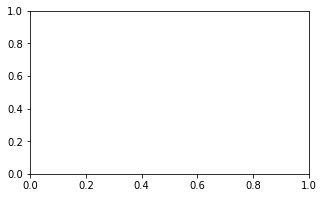

In [108]:
plt.figure(figsize=(5,3))

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

plt.boxplot(results, labels=names, showmeans=True)

plt.ylabel('Mean absolute error', fontdict=font)
plt.xlabel('Algorithms', fontdict=font)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.tight_layout()


plt.savefig(r'F:\Ishani\Modeling\Images\ML_all_descriptors.tiff', dpi = 600)

In [99]:
# Predicting using all the models

pred_knn = knn_best.predict(X_test)
pred_rf = rf_best.predict(X_test)
pred_svm = svm_best.predict(X_test)
pred_ensemble = ensemble.predict(X_test)

In [100]:
import sklearn.metrics as sm

In [101]:
#knn
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, pred_knn), 5)) 
print("Root Mean squared error =", round(sm.mean_squared_error(y_test, pred_knn, squared=False), 5))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred_knn), 5))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_knn), 5))
print("R2 score =", round(sm.r2_score(y_test, pred_knn), 5))

Mean absolute error = 0.37034
Root Mean squared error = 0.51281
Median absolute error = 0.26667
Explain variance score = 0.87312
R2 score = 0.87312


In [102]:
#rf
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, pred_rf), 5)) 
print("Root Mean squared error =", round(sm.mean_squared_error(y_test, pred_rf, squared=False), 5))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred_rf), 5))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_rf), 5))
print("R2 score =", round(sm.r2_score(y_test, pred_rf), 5))

Mean absolute error = 0.31372
Root Mean squared error = 0.43332
Median absolute error = 0.22445
Explain variance score = 0.91
R2 score = 0.9094


In [103]:
#svm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, pred_svm), 5)) 
print("Root Mean squared error =", round(sm.mean_squared_error(y_test, pred_svm, squared=False), 5))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred_svm), 5))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_svm), 5))
print("R2 score =", round(sm.r2_score(y_test, pred_svm), 5))

Mean absolute error = 0.30575
Root Mean squared error = 0.45328
Median absolute error = 0.20517
Explain variance score = 0.90174
R2 score = 0.90087


In [104]:
#ensemble
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, pred_ensemble), 5)) 
print("Root Mean squared error =", round(sm.mean_squared_error(y_test, pred_ensemble, squared=False), 5))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred_ensemble), 5))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_ensemble), 5))
print("R2 score =", round(sm.r2_score(y_test, pred_ensemble), 5))

Mean absolute error = 0.30307
Root Mean squared error = 0.41632
Median absolute error = 0.20848
Explain variance score = 0.91674
R2 score = 0.91637


### Performing feature reduction for selecting best features

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [111]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func = f_regression, k = 15)

X_new = selector.fit_transform(X_train, y_train)

names = df_feat_sc.columns.values[selector.get_support()]

scores = selector.scores_[selector.get_support()]

names_scores = list(zip(names, scores))

ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])

imp = ns_df.sort_values('F_Scores', ascending=False)
imp

C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


,Feat_names,F_Scores
1,SP-4,3948.037178
2,SP-5,3862.861739
4,MPC3,3720.207277
13,SRW6,3519.163827
9,MWC4,3454.210089
8,MWC3,3446.508675
0,SP-3,3422.912400
3,MPC2,3409.834111
12,SRW4,3346.322033
5,MPC4,3323.352675


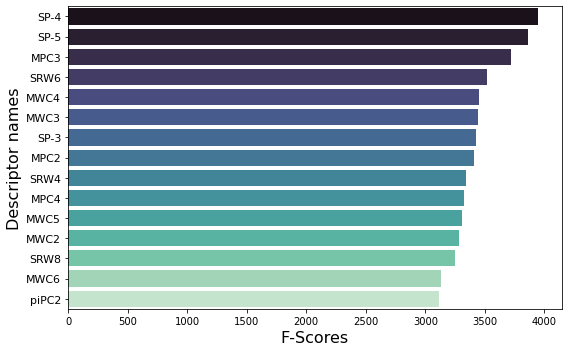

In [127]:

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

plt.figure(figsize=(8,5))

sns.barplot(data = imp, x = 'F_Scores', y = 'Feat_names', palette = 'mako')

plt.xlabel('F-Scores', fontdict=font)
plt.ylabel('Descriptor names', fontdict=font)

plt.yticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.savefig(r'F:\Ishani\Modeling\Images\top15.tiff', dpi = 600)


In [128]:
f_names = []
for i in range(0, len(imp)):
    f_names.append(imp['Feat_names'][i])
f_names

['SP-3',
 'SP-4',
 'SP-5',
 'MPC2',
 'MPC3',
 'MPC4',
 'piPC2',
 'MWC2',
 'MWC3',
 'MWC4',
 'MWC5',
 'MWC6',
 'SRW4',
 'SRW6',
 'SRW8']

In [129]:
new_X = df_feat_sc[['SP-3','SP-4','SP-5','MPC2','MPC3','MPC4','piPC2','MWC2',
                  'MWC3','MWC4','MWC5','MWC6','SRW4','SRW6','SRW8']]
new_X

,SP-3,SP-4,SP-5,MPC2,MPC3,MPC4,piPC2,MWC2,MWC3,MWC4,MWC5,MWC6,SRW4,SRW6,SRW8
0,-1.519081,-1.492325,-1.572359,-1.311430,-1.386088,-1.352232,-1.917101,-1.848321,-1.715824,-1.511380,-1.396369,-1.246499,-1.779775,-1.490962,-1.238139
1,0.121174,0.353562,0.413567,0.042838,0.297559,0.488825,0.676132,0.293827,0.367889,0.407191,0.476097,0.519325,0.287354,0.345925,0.433435
2,-0.411270,-0.261189,-0.213524,-0.425947,-0.347242,-0.257550,0.425554,-0.212739,-0.149046,-0.115285,-0.073624,-0.047616,-0.203288,-0.129398,-0.053198
3,3.183387,3.203311,2.988593,3.115985,3.270808,3.225531,1.283518,1.915624,1.881698,1.864332,1.816731,1.791416,1.913553,1.900492,1.862692
4,-1.090664,-1.001239,-0.930849,-1.155169,-1.027865,-0.954166,-0.615916,-1.320587,-1.203171,-1.164735,-1.079032,-1.046258,-1.312997,-1.185267,-1.030007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,-0.850379,-0.851342,-0.795654,-0.946819,-0.848753,-0.829770,-0.943090,-0.909358,-0.830303,-0.820493,-0.761644,-0.750284,-0.907903,-0.831830,-0.742739
1601,0.144767,0.285197,0.179749,0.511623,0.010981,-0.008758,0.545633,0.736438,0.554370,0.464264,0.334547,0.265639,0.701732,0.468160,0.250440
1602,1.378263,1.630825,1.699958,1.761717,1.802094,2.031332,1.325495,1.283284,1.314469,1.411172,1.429504,1.485286,1.314855,1.438758,1.508055
1603,-1.541582,-1.611962,-1.624866,-1.519779,-1.529377,-1.501507,-2.532610,-2.343927,-2.398808,-2.338632,-2.366508,-2.296823,-2.334124,-2.240016,-2.142437


In [130]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state=101)

### Working on Top 15 descriptors

In [131]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

### Applying KNN (reduced features)

In [132]:
array = np.arange(2, 26)
params_knn = [{'n_neighbors': array, 'weights': ['uniform','distance'], 
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]

knn_gs = GridSearchCV(knn, params_knn, cv=10, verbose=3, 
                      scoring= 'neg_mean_absolute_error')#fit model to training data
knn_gs.fit(X_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
[CV 1/10] END algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 2/10] END algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 3/10] END algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 4/10] END algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 5/10] END algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 6/10] END algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 7/10] END algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 8/10] END algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 9/10] END algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 10/10] END algorithm=auto, n_neighbors=2, weights=uniform; total time=   0.0s
[CV 1/10] END algorithm=auto, n_neighbors=2, weights=distance; total time=   0.0s
[CV 2/10] END algorithm=auto, n_neighbors=

[CV 9/10] END algorithm=auto, n_neighbors=7, weights=uniform; total time=   0.0s
[CV 10/10] END algorithm=auto, n_neighbors=7, weights=uniform; total time=   0.0s
[CV 1/10] END algorithm=auto, n_neighbors=7, weights=distance; total time=   0.0s
[CV 2/10] END algorithm=auto, n_neighbors=7, weights=distance; total time=   0.0s
[CV 3/10] END algorithm=auto, n_neighbors=7, weights=distance; total time=   0.0s
[CV 4/10] END algorithm=auto, n_neighbors=7, weights=distance; total time=   0.0s
[CV 5/10] END algorithm=auto, n_neighbors=7, weights=distance; total time=   0.0s
[CV 6/10] END algorithm=auto, n_neighbors=7, weights=distance; total time=   0.0s
[CV 7/10] END algorithm=auto, n_neighbors=7, weights=distance; total time=   0.0s
[CV 8/10] END algorithm=auto, n_neighbors=7, weights=distance; total time=   0.0s
[CV 9/10] END algorithm=auto, n_neighbors=7, weights=distance; total time=   0.0s
[CV 10/10] END algorithm=auto, n_neighbors=7, weights=distance; total time=   0.0s
[CV 1/10] END al

[CV 3/10] END algorithm=auto, n_neighbors=12, weights=distance; total time=   0.0s
[CV 4/10] END algorithm=auto, n_neighbors=12, weights=distance; total time=   0.0s
[CV 5/10] END algorithm=auto, n_neighbors=12, weights=distance; total time=   0.0s
[CV 6/10] END algorithm=auto, n_neighbors=12, weights=distance; total time=   0.0s
[CV 7/10] END algorithm=auto, n_neighbors=12, weights=distance; total time=   0.0s
[CV 8/10] END algorithm=auto, n_neighbors=12, weights=distance; total time=   0.0s
[CV 9/10] END algorithm=auto, n_neighbors=12, weights=distance; total time=   0.0s
[CV 10/10] END algorithm=auto, n_neighbors=12, weights=distance; total time=   0.0s
[CV 1/10] END algorithm=auto, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 2/10] END algorithm=auto, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 3/10] END algorithm=auto, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 4/10] END algorithm=auto, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 5/1

[CV 9/10] END algorithm=auto, n_neighbors=17, weights=distance; total time=   0.0s
[CV 10/10] END algorithm=auto, n_neighbors=17, weights=distance; total time=   0.0s
[CV 1/10] END algorithm=auto, n_neighbors=18, weights=uniform; total time=   0.0s
[CV 2/10] END algorithm=auto, n_neighbors=18, weights=uniform; total time=   0.0s
[CV 3/10] END algorithm=auto, n_neighbors=18, weights=uniform; total time=   0.0s
[CV 4/10] END algorithm=auto, n_neighbors=18, weights=uniform; total time=   0.0s
[CV 5/10] END algorithm=auto, n_neighbors=18, weights=uniform; total time=   0.0s
[CV 6/10] END algorithm=auto, n_neighbors=18, weights=uniform; total time=   0.0s
[CV 7/10] END algorithm=auto, n_neighbors=18, weights=uniform; total time=   0.0s
[CV 8/10] END algorithm=auto, n_neighbors=18, weights=uniform; total time=   0.0s
[CV 9/10] END algorithm=auto, n_neighbors=18, weights=uniform; total time=   0.0s
[CV 10/10] END algorithm=auto, n_neighbors=18, weights=uniform; total time=   0.0s
[CV 1/10] EN

[CV 3/10] END algorithm=auto, n_neighbors=23, weights=uniform; total time=   0.0s
[CV 4/10] END algorithm=auto, n_neighbors=23, weights=uniform; total time=   0.0s
[CV 5/10] END algorithm=auto, n_neighbors=23, weights=uniform; total time=   0.0s
[CV 6/10] END algorithm=auto, n_neighbors=23, weights=uniform; total time=   0.0s
[CV 7/10] END algorithm=auto, n_neighbors=23, weights=uniform; total time=   0.0s
[CV 8/10] END algorithm=auto, n_neighbors=23, weights=uniform; total time=   0.0s
[CV 9/10] END algorithm=auto, n_neighbors=23, weights=uniform; total time=   0.0s
[CV 10/10] END algorithm=auto, n_neighbors=23, weights=uniform; total time=   0.0s
[CV 1/10] END algorithm=auto, n_neighbors=23, weights=distance; total time=   0.0s
[CV 2/10] END algorithm=auto, n_neighbors=23, weights=distance; total time=   0.0s
[CV 3/10] END algorithm=auto, n_neighbors=23, weights=distance; total time=   0.0s
[CV 4/10] END algorithm=auto, n_neighbors=23, weights=distance; total time=   0.0s
[CV 5/10] E

[CV 9/10] END algorithm=ball_tree, n_neighbors=4, weights=uniform; total time=   0.0s
[CV 10/10] END algorithm=ball_tree, n_neighbors=4, weights=uniform; total time=   0.0s
[CV 1/10] END algorithm=ball_tree, n_neighbors=4, weights=distance; total time=   0.0s
[CV 2/10] END algorithm=ball_tree, n_neighbors=4, weights=distance; total time=   0.0s
[CV 3/10] END algorithm=ball_tree, n_neighbors=4, weights=distance; total time=   0.0s
[CV 4/10] END algorithm=ball_tree, n_neighbors=4, weights=distance; total time=   0.0s
[CV 5/10] END algorithm=ball_tree, n_neighbors=4, weights=distance; total time=   0.0s
[CV 6/10] END algorithm=ball_tree, n_neighbors=4, weights=distance; total time=   0.0s
[CV 7/10] END algorithm=ball_tree, n_neighbors=4, weights=distance; total time=   0.0s
[CV 8/10] END algorithm=ball_tree, n_neighbors=4, weights=distance; total time=   0.0s
[CV 9/10] END algorithm=ball_tree, n_neighbors=4, weights=distance; total time=   0.0s
[CV 10/10] END algorithm=ball_tree, n_neighb

[CV 7/10] END algorithm=ball_tree, n_neighbors=9, weights=uniform; total time=   0.0s
[CV 8/10] END algorithm=ball_tree, n_neighbors=9, weights=uniform; total time=   0.0s
[CV 9/10] END algorithm=ball_tree, n_neighbors=9, weights=uniform; total time=   0.0s
[CV 10/10] END algorithm=ball_tree, n_neighbors=9, weights=uniform; total time=   0.0s
[CV 1/10] END algorithm=ball_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV 2/10] END algorithm=ball_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV 3/10] END algorithm=ball_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV 4/10] END algorithm=ball_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV 5/10] END algorithm=ball_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV 6/10] END algorithm=ball_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV 7/10] END algorithm=ball_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV 8/10] END algorithm=ball_tree, n_neighbors

[CV 1/10] END algorithm=ball_tree, n_neighbors=14, weights=uniform; total time=   0.0s
[CV 2/10] END algorithm=ball_tree, n_neighbors=14, weights=uniform; total time=   0.0s
[CV 3/10] END algorithm=ball_tree, n_neighbors=14, weights=uniform; total time=   0.0s
[CV 4/10] END algorithm=ball_tree, n_neighbors=14, weights=uniform; total time=   0.0s
[CV 5/10] END algorithm=ball_tree, n_neighbors=14, weights=uniform; total time=   0.0s
[CV 6/10] END algorithm=ball_tree, n_neighbors=14, weights=uniform; total time=   0.0s
[CV 7/10] END algorithm=ball_tree, n_neighbors=14, weights=uniform; total time=   0.0s
[CV 8/10] END algorithm=ball_tree, n_neighbors=14, weights=uniform; total time=   0.0s
[CV 9/10] END algorithm=ball_tree, n_neighbors=14, weights=uniform; total time=   0.0s
[CV 10/10] END algorithm=ball_tree, n_neighbors=14, weights=uniform; total time=   0.0s
[CV 1/10] END algorithm=ball_tree, n_neighbors=14, weights=distance; total time=   0.0s
[CV 2/10] END algorithm=ball_tree, n_neig

[CV 5/10] END algorithm=ball_tree, n_neighbors=18, weights=distance; total time=   0.0s
[CV 6/10] END algorithm=ball_tree, n_neighbors=18, weights=distance; total time=   0.0s
[CV 7/10] END algorithm=ball_tree, n_neighbors=18, weights=distance; total time=   0.0s
[CV 8/10] END algorithm=ball_tree, n_neighbors=18, weights=distance; total time=   0.0s
[CV 9/10] END algorithm=ball_tree, n_neighbors=18, weights=distance; total time=   0.0s
[CV 10/10] END algorithm=ball_tree, n_neighbors=18, weights=distance; total time=   0.0s
[CV 1/10] END algorithm=ball_tree, n_neighbors=19, weights=uniform; total time=   0.0s
[CV 2/10] END algorithm=ball_tree, n_neighbors=19, weights=uniform; total time=   0.0s
[CV 3/10] END algorithm=ball_tree, n_neighbors=19, weights=uniform; total time=   0.0s
[CV 4/10] END algorithm=ball_tree, n_neighbors=19, weights=uniform; total time=   0.0s
[CV 5/10] END algorithm=ball_tree, n_neighbors=19, weights=uniform; total time=   0.0s
[CV 6/10] END algorithm=ball_tree, n

[CV 8/10] END algorithm=ball_tree, n_neighbors=23, weights=distance; total time=   0.0s
[CV 9/10] END algorithm=ball_tree, n_neighbors=23, weights=distance; total time=   0.0s
[CV 10/10] END algorithm=ball_tree, n_neighbors=23, weights=distance; total time=   0.0s
[CV 1/10] END algorithm=ball_tree, n_neighbors=24, weights=uniform; total time=   0.0s
[CV 2/10] END algorithm=ball_tree, n_neighbors=24, weights=uniform; total time=   0.0s
[CV 3/10] END algorithm=ball_tree, n_neighbors=24, weights=uniform; total time=   0.0s
[CV 4/10] END algorithm=ball_tree, n_neighbors=24, weights=uniform; total time=   0.0s
[CV 5/10] END algorithm=ball_tree, n_neighbors=24, weights=uniform; total time=   0.0s
[CV 6/10] END algorithm=ball_tree, n_neighbors=24, weights=uniform; total time=   0.0s
[CV 7/10] END algorithm=ball_tree, n_neighbors=24, weights=uniform; total time=   0.0s
[CV 8/10] END algorithm=ball_tree, n_neighbors=24, weights=uniform; total time=   0.0s
[CV 9/10] END algorithm=ball_tree, n_ne

[CV 4/10] END algorithm=kd_tree, n_neighbors=4, weights=distance; total time=   0.0s
[CV 5/10] END algorithm=kd_tree, n_neighbors=4, weights=distance; total time=   0.0s
[CV 6/10] END algorithm=kd_tree, n_neighbors=4, weights=distance; total time=   0.0s
[CV 7/10] END algorithm=kd_tree, n_neighbors=4, weights=distance; total time=   0.0s
[CV 8/10] END algorithm=kd_tree, n_neighbors=4, weights=distance; total time=   0.0s
[CV 9/10] END algorithm=kd_tree, n_neighbors=4, weights=distance; total time=   0.0s
[CV 10/10] END algorithm=kd_tree, n_neighbors=4, weights=distance; total time=   0.0s
[CV 1/10] END algorithm=kd_tree, n_neighbors=5, weights=uniform; total time=   0.0s
[CV 2/10] END algorithm=kd_tree, n_neighbors=5, weights=uniform; total time=   0.0s
[CV 3/10] END algorithm=kd_tree, n_neighbors=5, weights=uniform; total time=   0.0s
[CV 4/10] END algorithm=kd_tree, n_neighbors=5, weights=uniform; total time=   0.0s
[CV 5/10] END algorithm=kd_tree, n_neighbors=5, weights=uniform; tot

[CV 2/10] END algorithm=kd_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV 3/10] END algorithm=kd_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV 4/10] END algorithm=kd_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV 5/10] END algorithm=kd_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV 6/10] END algorithm=kd_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV 7/10] END algorithm=kd_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV 8/10] END algorithm=kd_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV 9/10] END algorithm=kd_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV 10/10] END algorithm=kd_tree, n_neighbors=9, weights=distance; total time=   0.0s
[CV 1/10] END algorithm=kd_tree, n_neighbors=10, weights=uniform; total time=   0.0s
[CV 2/10] END algorithm=kd_tree, n_neighbors=10, weights=uniform; total time=   0.0s
[CV 3/10] END algorithm=kd_tree, n_neighbors=10, weights=uniform

[CV 1/10] END algorithm=kd_tree, n_neighbors=15, weights=distance; total time=   0.0s
[CV 2/10] END algorithm=kd_tree, n_neighbors=15, weights=distance; total time=   0.0s
[CV 3/10] END algorithm=kd_tree, n_neighbors=15, weights=distance; total time=   0.0s
[CV 4/10] END algorithm=kd_tree, n_neighbors=15, weights=distance; total time=   0.0s
[CV 5/10] END algorithm=kd_tree, n_neighbors=15, weights=distance; total time=   0.0s
[CV 6/10] END algorithm=kd_tree, n_neighbors=15, weights=distance; total time=   0.0s
[CV 7/10] END algorithm=kd_tree, n_neighbors=15, weights=distance; total time=   0.0s
[CV 8/10] END algorithm=kd_tree, n_neighbors=15, weights=distance; total time=   0.0s
[CV 9/10] END algorithm=kd_tree, n_neighbors=15, weights=distance; total time=   0.0s
[CV 10/10] END algorithm=kd_tree, n_neighbors=15, weights=distance; total time=   0.0s
[CV 1/10] END algorithm=kd_tree, n_neighbors=16, weights=uniform; total time=   0.0s
[CV 2/10] END algorithm=kd_tree, n_neighbors=16, weigh

[CV 6/10] END algorithm=kd_tree, n_neighbors=21, weights=uniform; total time=   0.0s
[CV 7/10] END algorithm=kd_tree, n_neighbors=21, weights=uniform; total time=   0.0s
[CV 8/10] END algorithm=kd_tree, n_neighbors=21, weights=uniform; total time=   0.0s
[CV 9/10] END algorithm=kd_tree, n_neighbors=21, weights=uniform; total time=   0.0s
[CV 10/10] END algorithm=kd_tree, n_neighbors=21, weights=uniform; total time=   0.0s
[CV 1/10] END algorithm=kd_tree, n_neighbors=21, weights=distance; total time=   0.0s
[CV 2/10] END algorithm=kd_tree, n_neighbors=21, weights=distance; total time=   0.0s
[CV 3/10] END algorithm=kd_tree, n_neighbors=21, weights=distance; total time=   0.0s
[CV 4/10] END algorithm=kd_tree, n_neighbors=21, weights=distance; total time=   0.0s
[CV 5/10] END algorithm=kd_tree, n_neighbors=21, weights=distance; total time=   0.0s
[CV 6/10] END algorithm=kd_tree, n_neighbors=21, weights=distance; total time=   0.0s
[CV 7/10] END algorithm=kd_tree, n_neighbors=21, weights=d

[CV 5/10] END algorithm=brute, n_neighbors=3, weights=uniform; total time=   0.0s
[CV 6/10] END algorithm=brute, n_neighbors=3, weights=uniform; total time=   0.0s
[CV 7/10] END algorithm=brute, n_neighbors=3, weights=uniform; total time=   0.0s
[CV 8/10] END algorithm=brute, n_neighbors=3, weights=uniform; total time=   0.0s
[CV 9/10] END algorithm=brute, n_neighbors=3, weights=uniform; total time=   0.0s
[CV 10/10] END algorithm=brute, n_neighbors=3, weights=uniform; total time=   0.0s
[CV 1/10] END algorithm=brute, n_neighbors=3, weights=distance; total time=   0.0s
[CV 2/10] END algorithm=brute, n_neighbors=3, weights=distance; total time=   0.0s
[CV 3/10] END algorithm=brute, n_neighbors=3, weights=distance; total time=   0.0s
[CV 4/10] END algorithm=brute, n_neighbors=3, weights=distance; total time=   0.0s
[CV 5/10] END algorithm=brute, n_neighbors=3, weights=distance; total time=   0.0s
[CV 6/10] END algorithm=brute, n_neighbors=3, weights=distance; total time=   0.0s
[CV 7/10]

[CV 7/10] END algorithm=brute, n_neighbors=8, weights=uniform; total time=   0.0s
[CV 8/10] END algorithm=brute, n_neighbors=8, weights=uniform; total time=   0.0s
[CV 9/10] END algorithm=brute, n_neighbors=8, weights=uniform; total time=   0.0s
[CV 10/10] END algorithm=brute, n_neighbors=8, weights=uniform; total time=   0.0s
[CV 1/10] END algorithm=brute, n_neighbors=8, weights=distance; total time=   0.0s
[CV 2/10] END algorithm=brute, n_neighbors=8, weights=distance; total time=   0.0s
[CV 3/10] END algorithm=brute, n_neighbors=8, weights=distance; total time=   0.0s
[CV 4/10] END algorithm=brute, n_neighbors=8, weights=distance; total time=   0.0s
[CV 5/10] END algorithm=brute, n_neighbors=8, weights=distance; total time=   0.0s
[CV 6/10] END algorithm=brute, n_neighbors=8, weights=distance; total time=   0.0s
[CV 7/10] END algorithm=brute, n_neighbors=8, weights=distance; total time=   0.0s
[CV 8/10] END algorithm=brute, n_neighbors=8, weights=distance; total time=   0.0s
[CV 9/1

[CV 7/10] END algorithm=brute, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 8/10] END algorithm=brute, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 9/10] END algorithm=brute, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 10/10] END algorithm=brute, n_neighbors=13, weights=uniform; total time=   0.0s
[CV 1/10] END algorithm=brute, n_neighbors=13, weights=distance; total time=   0.0s
[CV 2/10] END algorithm=brute, n_neighbors=13, weights=distance; total time=   0.0s
[CV 3/10] END algorithm=brute, n_neighbors=13, weights=distance; total time=   0.0s
[CV 4/10] END algorithm=brute, n_neighbors=13, weights=distance; total time=   0.0s
[CV 5/10] END algorithm=brute, n_neighbors=13, weights=distance; total time=   0.0s
[CV 6/10] END algorithm=brute, n_neighbors=13, weights=distance; total time=   0.0s
[CV 7/10] END algorithm=brute, n_neighbors=13, weights=distance; total time=   0.0s
[CV 8/10] END algorithm=brute, n_neighbors=13, weights=distance; total time=   

[CV 6/10] END algorithm=brute, n_neighbors=19, weights=uniform; total time=   0.0s
[CV 7/10] END algorithm=brute, n_neighbors=19, weights=uniform; total time=   0.0s
[CV 8/10] END algorithm=brute, n_neighbors=19, weights=uniform; total time=   0.0s
[CV 9/10] END algorithm=brute, n_neighbors=19, weights=uniform; total time=   0.0s
[CV 10/10] END algorithm=brute, n_neighbors=19, weights=uniform; total time=   0.0s
[CV 1/10] END algorithm=brute, n_neighbors=19, weights=distance; total time=   0.0s
[CV 2/10] END algorithm=brute, n_neighbors=19, weights=distance; total time=   0.0s
[CV 3/10] END algorithm=brute, n_neighbors=19, weights=distance; total time=   0.0s
[CV 4/10] END algorithm=brute, n_neighbors=19, weights=distance; total time=   0.0s
[CV 5/10] END algorithm=brute, n_neighbors=19, weights=distance; total time=   0.0s
[CV 6/10] END algorithm=brute, n_neighbors=19, weights=distance; total time=   0.0s
[CV 7/10] END algorithm=brute, n_neighbors=19, weights=distance; total time=   0

[CV 5/10] END algorithm=brute, n_neighbors=24, weights=uniform; total time=   0.0s
[CV 6/10] END algorithm=brute, n_neighbors=24, weights=uniform; total time=   0.0s
[CV 7/10] END algorithm=brute, n_neighbors=24, weights=uniform; total time=   0.0s
[CV 8/10] END algorithm=brute, n_neighbors=24, weights=uniform; total time=   0.0s
[CV 9/10] END algorithm=brute, n_neighbors=24, weights=uniform; total time=   0.0s
[CV 10/10] END algorithm=brute, n_neighbors=24, weights=uniform; total time=   0.0s
[CV 1/10] END algorithm=brute, n_neighbors=24, weights=distance; total time=   0.0s
[CV 2/10] END algorithm=brute, n_neighbors=24, weights=distance; total time=   0.0s
[CV 3/10] END algorithm=brute, n_neighbors=24, weights=distance; total time=   0.0s
[CV 4/10] END algorithm=brute, n_neighbors=24, weights=distance; total time=   0.0s
[CV 5/10] END algorithm=brute, n_neighbors=24, weights=distance; total time=   0.0s
[CV 6/10] END algorithm=brute, n_neighbors=24, weights=distance; total time=   0.

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25]),
                          'weights': ['uniform', 'distance']}],
             scoring='neg_mean_absolute_error', verbose=3)

In [133]:
knn_gs.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=11, weights='distance')

In [134]:
#save best model
knn_best = knn_gs.best_estimator_
pickle.dump(knn_best, open('knn_best_top15.pkl', 'wb'))

In [135]:
knn_gs.best_score_

-0.39528561906491866

In [136]:
pred_knn = knn_best.predict(X_test)
df_knn = pd.DataFrame({'y_test': y_test,
                      'pred_knn': pred_knn})
df_knn

,y_test,pred_knn
104,-6.800000,-6.833333
524,-6.000000,-5.737631
1563,-7.433333,-7.878284
1462,-5.700000,-5.433333
749,-7.900000,-7.433333
...,...,...
1198,-5.866667,-6.573990
475,-6.333333,-6.666667
351,-6.166667,-6.151820
704,-8.366667,-7.935319


In [41]:
#df_knn.to_csv(r'df_knn.csv')

### Applying RandomForest (reduced features) 

In [137]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [138]:
array = np.arange(10, 101, 10)
array

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [139]:
array = np.arange(10, 101, 10)
params_rf = [{'n_estimators': array, 'max_features': ['auto', 'sqrt', 'log2']}]#use gridsearch to test all values for n_estimators

rf_gs = GridSearchCV(rf, params_rf, cv=10, verbose=3, 
                     scoring='neg_mean_absolute_error')#fit model to training data

rf_gs.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV 1/10] END ............max_features=auto, n_estimators=10; total time=   0.0s
[CV 2/10] END ............max_features=auto, n_estimators=10; total time=   0.0s
[CV 3/10] END ............max_features=auto, n_estimators=10; total time=   0.0s
[CV 4/10] END ............max_features=auto, n_estimators=10; total time=   0.0s
[CV 5/10] END ............max_features=auto, n_estimators=10; total time=   0.0s
[CV 6/10] END ............max_features=auto, n_estimators=10; total time=   0.0s
[CV 7/10] END ............max_features=auto, n_estimators=10; total time=   0.0s
[CV 8/10] END ............max_features=auto, n_estimators=10; total time=   0.0s
[CV 9/10] END ............max_features=auto, n_estimators=10; total time=   0.0s
[CV 10/10] END ...........max_features=auto, n_estimators=10; total time=   0.0s
[CV 1/10] END ............max_features=auto, n_estimators=20; total time=   0.0s
[CV 2/10] END ............max_features=auto, n

[CV 7/10] END ............max_features=sqrt, n_estimators=10; total time=   0.0s
[CV 8/10] END ............max_features=sqrt, n_estimators=10; total time=   0.0s
[CV 9/10] END ............max_features=sqrt, n_estimators=10; total time=   0.0s
[CV 10/10] END ...........max_features=sqrt, n_estimators=10; total time=   0.0s
[CV 1/10] END ............max_features=sqrt, n_estimators=20; total time=   0.0s
[CV 2/10] END ............max_features=sqrt, n_estimators=20; total time=   0.0s
[CV 3/10] END ............max_features=sqrt, n_estimators=20; total time=   0.0s
[CV 4/10] END ............max_features=sqrt, n_estimators=20; total time=   0.0s
[CV 5/10] END ............max_features=sqrt, n_estimators=20; total time=   0.0s
[CV 6/10] END ............max_features=sqrt, n_estimators=20; total time=   0.0s
[CV 7/10] END ............max_features=sqrt, n_estimators=20; total time=   0.0s
[CV 8/10] END ............max_features=sqrt, n_estimators=20; total time=   0.0s
[CV 9/10] END ............ma

[CV 4/10] END ............max_features=log2, n_estimators=20; total time=   0.0s
[CV 5/10] END ............max_features=log2, n_estimators=20; total time=   0.0s
[CV 6/10] END ............max_features=log2, n_estimators=20; total time=   0.0s
[CV 7/10] END ............max_features=log2, n_estimators=20; total time=   0.0s
[CV 8/10] END ............max_features=log2, n_estimators=20; total time=   0.0s
[CV 9/10] END ............max_features=log2, n_estimators=20; total time=   0.0s
[CV 10/10] END ...........max_features=log2, n_estimators=20; total time=   0.0s
[CV 1/10] END ............max_features=log2, n_estimators=30; total time=   0.0s
[CV 2/10] END ............max_features=log2, n_estimators=30; total time=   0.0s
[CV 3/10] END ............max_features=log2, n_estimators=30; total time=   0.0s
[CV 4/10] END ............max_features=log2, n_estimators=30; total time=   0.0s
[CV 5/10] END ............max_features=log2, n_estimators=30; total time=   0.0s
[CV 6/10] END ............ma

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])}],
             scoring='neg_mean_absolute_error', verbose=3)

In [140]:
#save best model
rf_best = rf_gs.best_estimator_#check best n_estimators value
print(rf_gs.best_params_)

{'max_features': 'sqrt', 'n_estimators': 60}


In [142]:
rf_gs.best_score_
pickle.dump(rf_best, open('rf_best_top15.pkl', 'wb'))

In [143]:
pred_rf = rf_best.predict(X_test)
df_rf = pd.DataFrame({'y_test': y_test,
                      'pred_rf': pred_rf})
pred_rf

array([ -7.28944444,  -5.5362963 ,  -7.82693519,  -5.49516733,
        -7.35282407,  -8.56541667,  -7.11660847,  -7.27722222,
        -6.74166667,  -5.62964815,  -4.21797222,  -7.68988889,
        -7.21272222,  -7.70216931,  -6.77749537,  -8.25472222,
        -7.61868519,  -6.20018519,  -3.61361111,  -5.86539021,
        -6.20018519,  -8.88447354,  -6.76150507,  -8.40601852,
        -6.56537037,  -6.42037037,  -5.94092593,  -8.12265873,
        -7.92055556,  -7.30802778,  -7.5626455 ,  -6.8395463 ,
        -5.91388889,  -6.92732407,  -9.44277778,  -5.73475926,
       -10.10416667,  -5.07516667,  -7.21773148,  -5.78898148,
        -6.74166667,  -4.89335802,  -7.70460185,  -4.0737963 ,
        -4.94974868,  -7.52187037,  -5.55614815,  -5.83297222,
        -5.47842593,  -7.16772222,  -7.89539153,  -6.8415086 ,
        -7.99361111,  -5.81666667,  -5.75239815,  -7.22572222,
        -5.89619753,  -5.5037037 ,  -6.09625794,  -8.09533333,
        -7.58069444,  -5.41324074,  -4.96546296,  -7.43

In [48]:
#df_rf.to_csv(r'df_rf.csv')

### Applying SVM (reduced features)

In [144]:
from sklearn.svm import SVR
svm = SVR()

In [145]:
params_svm = {'C': [0.1,1, 10, 100, 1000], 'gamma': ['scale', 'auto'], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

In [146]:
svm_gs = GridSearchCV(SVR(),params_svm,refit=True,verbose=3)

svm_gs.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=scal

[CV 2/5] END ................C=10, gamma=auto, kernel=linear; total time=   0.8s
[CV 3/5] END ................C=10, gamma=auto, kernel=linear; total time=   0.6s
[CV 4/5] END ................C=10, gamma=auto, kernel=linear; total time=   0.9s
[CV 5/5] END ................C=10, gamma=auto, kernel=linear; total time=   0.9s
[CV 1/5] END ..................C=10, gamma=auto, kernel=poly; total time=   1.4s
[CV 2/5] END ..................C=10, gamma=auto, kernel=poly; total time=   1.1s
[CV 3/5] END ..................C=10, gamma=auto, kernel=poly; total time=   1.2s
[CV 4/5] END ..................C=10, gamma=auto, kernel=poly; total time=   1.1s
[CV 5/5] END ..................C=10, gamma=auto, kernel=poly; total time=   1.1s
[CV 1/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [148]:
#save best model
svm_best = svm_gs.best_estimator_#check best n_estimators value
print(svm_gs.best_params_)
pickle.dump(svm_best, open('svm_best_top15.pkl', 'wb'))

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


In [83]:
pred_svm = svm_best.predict(X_test)
df_svm = pd.DataFrame({'y_test': y_test,
                      'pred_svm': pred_svm})
pred_svm

array([ -7.06273175,  -5.7777721 ,  -7.90116977,  -5.68680746,
        -7.40152652,  -8.464782  ,  -6.82475206,  -6.99105543,
        -6.89477498,  -5.41578673,  -4.26200553,  -8.36564533,
        -7.08632816,  -7.31885658,  -7.24512036,  -8.42248566,
        -7.27624833,  -6.17741608,  -3.80003337,  -5.93508845,
        -6.17741608,  -9.02136585,  -5.87606042,  -8.72669292,
        -6.47373105,  -6.43808434,  -6.07734897,  -8.41381799,
        -7.76429504,  -7.7257649 ,  -7.89871197,  -6.63999559,
        -5.81227619,  -6.44646289,  -8.48207179,  -5.75842409,
       -11.01731869,  -5.18750575,  -7.03296564,  -5.63424111,
        -6.89477498,  -5.49961471,  -7.31509671,  -3.766323  ,
        -5.13939079,  -7.51988122,  -5.5022873 ,  -6.00749951,
        -5.26699524,  -7.24703663,  -7.35598987,  -6.79990803,
        -7.75976609,  -5.60380523,  -5.80021383,  -6.80097406,
        -6.24131835,  -5.58325289,  -6.09355133,  -7.98790013,
        -7.70395644,  -4.96781538,  -5.19822189,  -7.54

In [45]:
#df_svm.to_csv(r'df_svm.csv')

### Applying Ensemble stacking (reduced features)

In [149]:
from sklearn.ensemble import VotingRegressor#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('svm', svm_best)]#create our voting classifier, inputting our models
ensemble = VotingRegressor(estimators)

In [150]:
#fit model to training data
ensemble.fit(X_train, y_train)#test our model on the test data
ensemble.score(X_test, y_test)

0.8808735941354999

In [151]:
pred_ensemble = ensemble.predict(X_test)

In [152]:
df_ensemble = pd.DataFrame({'y_test': y_test,
                      'pred_ensemble': pred_ensemble})
pred_ensemble

array([ -7.01396614,  -5.70735646,  -7.89086124,  -5.54001761,
        -7.36913538,  -8.32604058,  -7.15874522,  -7.35535181,
        -6.73787561,  -5.51277501,  -4.24029922,  -7.90505253,
        -7.16546301,  -7.56380228,  -6.97394847,  -8.20057734,
        -7.48025168,  -6.18307388,  -3.7081143 ,  -5.91044349,
        -6.18307388,  -8.91675752,  -6.47663875,  -8.60737297,
        -6.61165288,  -6.47195404,  -6.06543104,  -8.15377064,
        -7.89198723,  -7.49821751,  -7.74470114,  -6.78767614,
        -5.87946243,  -6.78460105,  -9.28096838,  -5.80946761,
       -10.36679951,  -5.13786741,  -7.16331473,  -5.70635197,
        -6.73787561,  -5.02178515,  -7.35740338,  -3.93278438,
        -5.08100349,  -7.51905481,  -5.53256082,  -5.89565937,
        -5.42035644,  -7.24046617,  -7.62334442,  -6.81601255,
        -8.02963138,  -5.75441722,  -5.84451572,  -6.99790609,
        -5.99293945,  -5.48463604,  -6.12342292,  -8.0880593 ,
        -7.60340719,  -5.39112365,  -5.13205939,  -7.42

In [60]:
#df_ensemble.to_csv(r'df_ensemble.csv')

In [153]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state=101)

In [154]:
from sklearn.ensemble import StackingRegressor

def get_stacking():
    # defining the base models
    level0 = list()
    level0.append(('KNN', knn_best))
    level0.append(('RF', rf_best))
    level0.append(('SVM', svm_best))
    # defining meta learner model
    level1 = LinearRegression()
    # defining the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model
 
# List of models to evaluate
def get_models():
    models = dict()
    models['KNN'] = knn_best
    models['RF'] = rf_best
    models['SVM'] = svm_best
    models['Stacking'] = get_stacking()
    return models
 
# evaluating model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# getting the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>KNN -0.400 (0.027)
>RF -0.389 (0.024)
>SVM -0.385 (0.021)
>Stacking -0.365 (0.024)


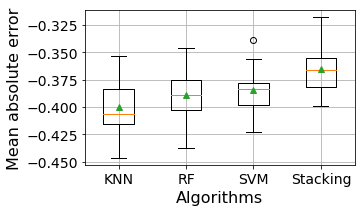

In [167]:
plt.figure(figsize=(5,3))

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

plt.boxplot(results, labels=names, showmeans=True)

plt.ylabel('Mean absolute error', fontdict=font)
plt.xlabel('Algorithms', fontdict=font)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.tight_layout()

plt.savefig(r'F:\Ishani\Modeling\Images\ML_top15.tiff', dpi = 600)

In [157]:
pred_knn = knn_best.predict(X_test)
pred_rf = rf_best.predict(X_test)
pred_svm = svm_best.predict(X_test)
pred_ensemble = ensemble.predict(X_test)

### Evaluating models

In [158]:
#knn
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, pred_knn), 5)) 
print("Root Mean squared error =", round(sm.mean_squared_error(y_test, pred_knn, squared=False), 5))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred_knn), 5))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_knn), 5))
print("R2 score =", round(sm.r2_score(y_test, pred_knn), 5))

Mean absolute error = 0.3893
Root Mean squared error = 0.5353
Median absolute error = 0.26794
Explain variance score = 0.86208
R2 score = 0.86174


In [159]:
#rf
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, pred_rf), 5)) 
print("Root Mean squared error =", round(sm.mean_squared_error(y_test, pred_rf, squared=False), 5))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred_rf), 5))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_rf), 5))
print("R2 score =", round(sm.r2_score(y_test, pred_rf), 5))

Mean absolute error = 0.38658
Root Mean squared error = 0.53826
Median absolute error = 0.27954
Explain variance score = 0.86042
R2 score = 0.86021


In [160]:
#svm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, pred_svm), 5)) 
print("Root Mean squared error =", round(sm.mean_squared_error(y_test, pred_svm, squared=False), 5))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred_svm), 5))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_svm), 5))
print("R2 score =", round(sm.r2_score(y_test, pred_svm), 5))

Mean absolute error = 0.38412
Root Mean squared error = 0.52615
Median absolute error = 0.27736
Explain variance score = 0.86661
R2 score = 0.86643


In [161]:
#ensemble
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, pred_ensemble), 5)) 
print("Root Mean squared error =", round(sm.mean_squared_error(y_test, pred_ensemble, squared=False), 5))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred_ensemble), 5))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_ensemble), 5))
print("R2 score =", round(sm.r2_score(y_test, pred_ensemble), 5))

Mean absolute error = 0.36262
Root Mean squared error = 0.49689
Median absolute error = 0.27269
Explain variance score = 0.88091
R2 score = 0.88087


In [162]:
newdf = pd.concat([y, df_x], axis=1)
newdf

,Dmean,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,nN,nO,nS,nF,nCl,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,...,PubchemFP699,PubchemFP700,PubchemFP701,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP708,PubchemFP709,PubchemFP710,PubchemFP711,PubchemFP712,PubchemFP714,PubchemFP734,PubchemFP735,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP880
0,-5.133333,2.0,-0.6449,0.415896,25.465700,16.785551,0.0,0.0,15.0,8.0,7.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,2423.150635,2624.319092,2750.008545,1985.620117,781.102173,171.389236,6.096384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-7.166667,0.0,2.0324,4.130650,115.110802,54.435482,23.0,23.0,42.0,25.0,17.0,22.0,2.0,0.0,0.0,0.0,1.0,1.0,4840.178223,4646.611328,6780.842773,7908.357422,9949.371094,11845.513672,10203.180664,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-6.833333,0.0,-1.3099,1.715838,71.444901,36.154724,16.0,18.0,30.0,19.0,11.0,12.0,7.0,0.0,0.0,0.0,0.0,0.0,3115.718506,3438.509766,5076.016602,5378.212891,4837.437988,3975.185547,3329.526367,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-10.466667,0.0,-3.6782,13.529155,184.464005,126.062752,0.0,0.0,119.0,55.0,64.0,41.0,0.0,14.0,0.0,0.0,0.0,0.0,9563.409180,10749.246094,17830.492188,21645.626953,21474.591797,20093.603516,18864.492188,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,-5.800000,0.0,-0.0692,0.004789,47.536098,22.409552,10.0,11.0,18.0,11.0,7.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,1757.653564,1915.786743,2635.351562,2627.433838,1700.110229,691.525513,83.774879,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,-5.400000,0.0,1.1429,1.306220,62.068401,34.357479,6.0,6.0,31.0,14.0,17.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,2200.606689,2537.503906,3496.376465,3689.718994,2991.309570,2333.649170,1460.705811,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,-6.100000,5.0,-1.1620,1.350244,130.673401,74.606171,6.0,6.0,70.0,37.0,33.0,23.0,3.0,11.0,0.0,0.0,0.0,0.0,6755.840820,6547.969727,9115.405273,9179.927734,10512.998047,11967.849609,13376.424805,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,-9.466667,2.0,1.4322,2.051197,147.352005,84.166962,6.0,6.0,72.0,38.0,34.0,28.0,0.0,8.0,2.0,0.0,0.0,0.0,8177.372559,9268.173828,12835.398438,14346.566406,15984.891602,15118.475586,9432.321289,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,-3.600000,0.0,-0.8900,0.792100,25.796000,19.796722,0.0,0.0,19.0,8.0,11.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,1328.925537,1286.774414,1649.687134,1520.895386,960.802490,283.649353,36.321262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
Dmean = pd.DataFrame({'Dmean': y})
Dmean

,Dmean
0,-5.133333
1,-7.166667
2,-6.833333
3,-10.466667
4,-5.800000
...,...
1600,-5.400000
1601,-6.100000
1602,-9.466667
1603,-3.600000


In [164]:
new = df_feat_sc[['SP-3','SP-4','SP-5','MPC2','MPC3','MPC4','piPC2','MWC2',
                  'MWC3','MWC4','MWC5','MWC6','SRW4','SRW6','SRW8']]
new

,SP-3,SP-4,SP-5,MPC2,MPC3,MPC4,piPC2,MWC2,MWC3,MWC4,MWC5,MWC6,SRW4,SRW6,SRW8
0,-1.519081,-1.492325,-1.572359,-1.311430,-1.386088,-1.352232,-1.917101,-1.848321,-1.715824,-1.511380,-1.396369,-1.246499,-1.779775,-1.490962,-1.238139
1,0.121174,0.353562,0.413567,0.042838,0.297559,0.488825,0.676132,0.293827,0.367889,0.407191,0.476097,0.519325,0.287354,0.345925,0.433435
2,-0.411270,-0.261189,-0.213524,-0.425947,-0.347242,-0.257550,0.425554,-0.212739,-0.149046,-0.115285,-0.073624,-0.047616,-0.203288,-0.129398,-0.053198
3,3.183387,3.203311,2.988593,3.115985,3.270808,3.225531,1.283518,1.915624,1.881698,1.864332,1.816731,1.791416,1.913553,1.900492,1.862692
4,-1.090664,-1.001239,-0.930849,-1.155169,-1.027865,-0.954166,-0.615916,-1.320587,-1.203171,-1.164735,-1.079032,-1.046258,-1.312997,-1.185267,-1.030007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,-0.850379,-0.851342,-0.795654,-0.946819,-0.848753,-0.829770,-0.943090,-0.909358,-0.830303,-0.820493,-0.761644,-0.750284,-0.907903,-0.831830,-0.742739
1601,0.144767,0.285197,0.179749,0.511623,0.010981,-0.008758,0.545633,0.736438,0.554370,0.464264,0.334547,0.265639,0.701732,0.468160,0.250440
1602,1.378263,1.630825,1.699958,1.761717,1.802094,2.031332,1.325495,1.283284,1.314469,1.411172,1.429504,1.485286,1.314855,1.438758,1.508055
1603,-1.541582,-1.611962,-1.624866,-1.519779,-1.529377,-1.501507,-2.532610,-2.343927,-2.398808,-2.338632,-2.366508,-2.296823,-2.334124,-2.240016,-2.142437


In [165]:
merged = pd.concat([Dmean, new], axis=1)
merged


,Dmean,SP-3,SP-4,SP-5,MPC2,MPC3,MPC4,piPC2,MWC2,MWC3,MWC4,MWC5,MWC6,SRW4,SRW6,SRW8
0,-5.133333,-1.519081,-1.492325,-1.572359,-1.311430,-1.386088,-1.352232,-1.917101,-1.848321,-1.715824,-1.511380,-1.396369,-1.246499,-1.779775,-1.490962,-1.238139
1,-7.166667,0.121174,0.353562,0.413567,0.042838,0.297559,0.488825,0.676132,0.293827,0.367889,0.407191,0.476097,0.519325,0.287354,0.345925,0.433435
2,-6.833333,-0.411270,-0.261189,-0.213524,-0.425947,-0.347242,-0.257550,0.425554,-0.212739,-0.149046,-0.115285,-0.073624,-0.047616,-0.203288,-0.129398,-0.053198
3,-10.466667,3.183387,3.203311,2.988593,3.115985,3.270808,3.225531,1.283518,1.915624,1.881698,1.864332,1.816731,1.791416,1.913553,1.900492,1.862692
4,-5.800000,-1.090664,-1.001239,-0.930849,-1.155169,-1.027865,-0.954166,-0.615916,-1.320587,-1.203171,-1.164735,-1.079032,-1.046258,-1.312997,-1.185267,-1.030007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,-5.400000,-0.850379,-0.851342,-0.795654,-0.946819,-0.848753,-0.829770,-0.943090,-0.909358,-0.830303,-0.820493,-0.761644,-0.750284,-0.907903,-0.831830,-0.742739
1601,-6.100000,0.144767,0.285197,0.179749,0.511623,0.010981,-0.008758,0.545633,0.736438,0.554370,0.464264,0.334547,0.265639,0.701732,0.468160,0.250440
1602,-9.466667,1.378263,1.630825,1.699958,1.761717,1.802094,2.031332,1.325495,1.283284,1.314469,1.411172,1.429504,1.485286,1.314855,1.438758,1.508055
1603,-3.600000,-1.541582,-1.611962,-1.624866,-1.519779,-1.529377,-1.501507,-2.532610,-2.343927,-2.398808,-2.338632,-2.366508,-2.296823,-2.334124,-2.240016,-2.142437


In [166]:
merged.to_csv('top15.csv')